### Loantap (Logistic Regression)

Business Case: LoanTap Logistic Regression

Loantap, a leading online fintech company, aims to enhance its lending process by leveraging data science and predictive analytics to make informed lending decisions. With a strong focus on delivering personal loans to both business owners and salaried individuals.The company's primary goal is to minimize the risk of default while expanding its customer base.

To achieve this goal, Loantap is committed to developing a robust predictive model that can accurately identify the creditworthiness of loan applicants. By identifying individuals who are likely to repay their loans promptly and those who may face challenges in doing so.


Problem Statement:

Given a set of attributes for an Individual, Loantap's data science team is tasked with creating a predictive model to distinguish between loan applicants who are likely to repay their personal loans and those who are at higher risk of default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loantap.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [9]:
print(df['term'].unique())
print(df['grade'].unique())
print(df['home_ownership'].unique())
print(df['verification_status'].unique())
print(df['loan_status'].unique())
print(df['initial_list_status'].unique())
print(df['application_type'].unique())
print(df['pub_rec_bankruptcies'].unique())
print(df['pub_rec'].unique())
print(df['total_acc'].nunique())
print(df['mort_acc'].nunique())
print(df['revol_util'].nunique())

[' 36 months' ' 60 months']
['B' 'A' 'C' 'E' 'D' 'F' 'G']
['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
['Not Verified' 'Source Verified' 'Verified']
['Fully Paid' 'Charged Off']
['w' 'f']
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
[ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.]
[ 0.  1.  2.  3.  4.  6.  5.  8.  9. 10. 11.  7. 19. 13. 40. 17. 86. 12.
 24. 15.]
118
33
1226


In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [11]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _")

loan_amnt
loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: count, Length: 1397, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
term
term
 36 months    302005
 60 months     94025
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
int_rate
int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: count, Length: 566, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
installment
installment
327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: count, Length: 55706, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
grade
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: c

### Univariate Analysis

In [3]:
num_data=[]
cat_data=[]
for i in df.columns:
    if df[i].nunique()<50:
        cat_data.append(i)
    else:
        num_data.append(i)
num_data
cat_data
num_data.remove('emp_title')
num_data.remove('issue_d')
num_data.remove('title')
num_data.remove('address')
num_data.remove('earliest_cr_line') 

In [4]:
num_data

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc']

In [5]:
cat_data

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

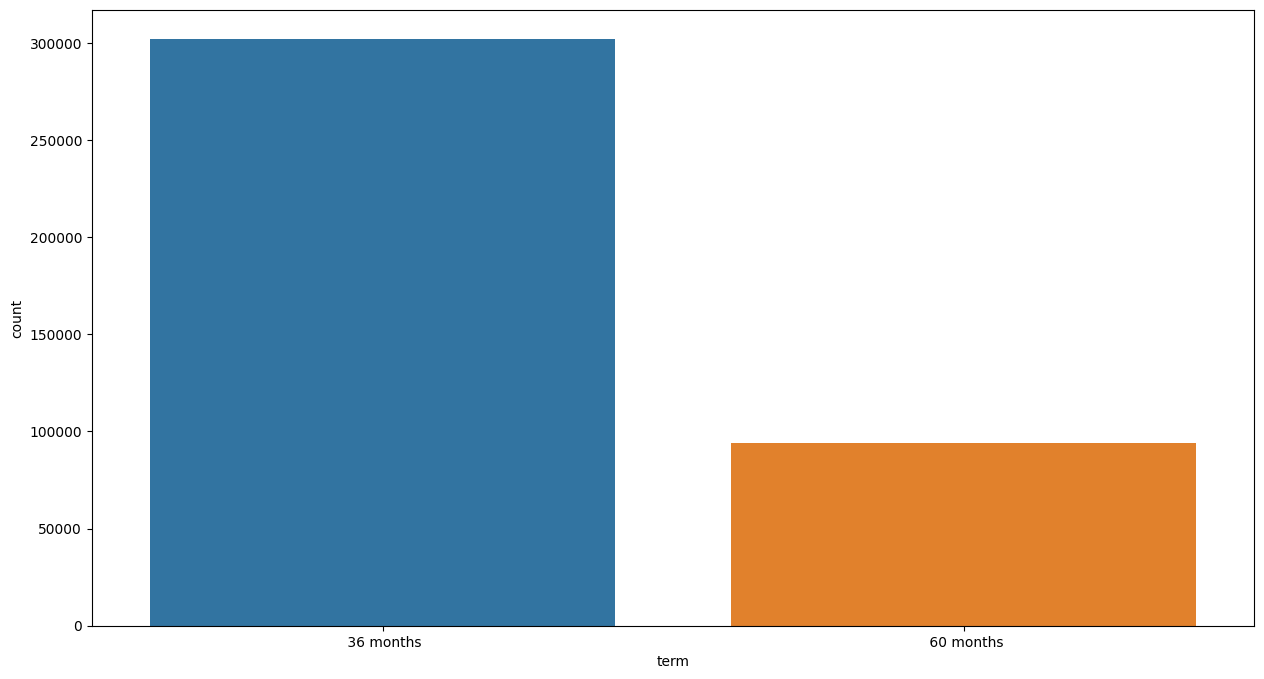

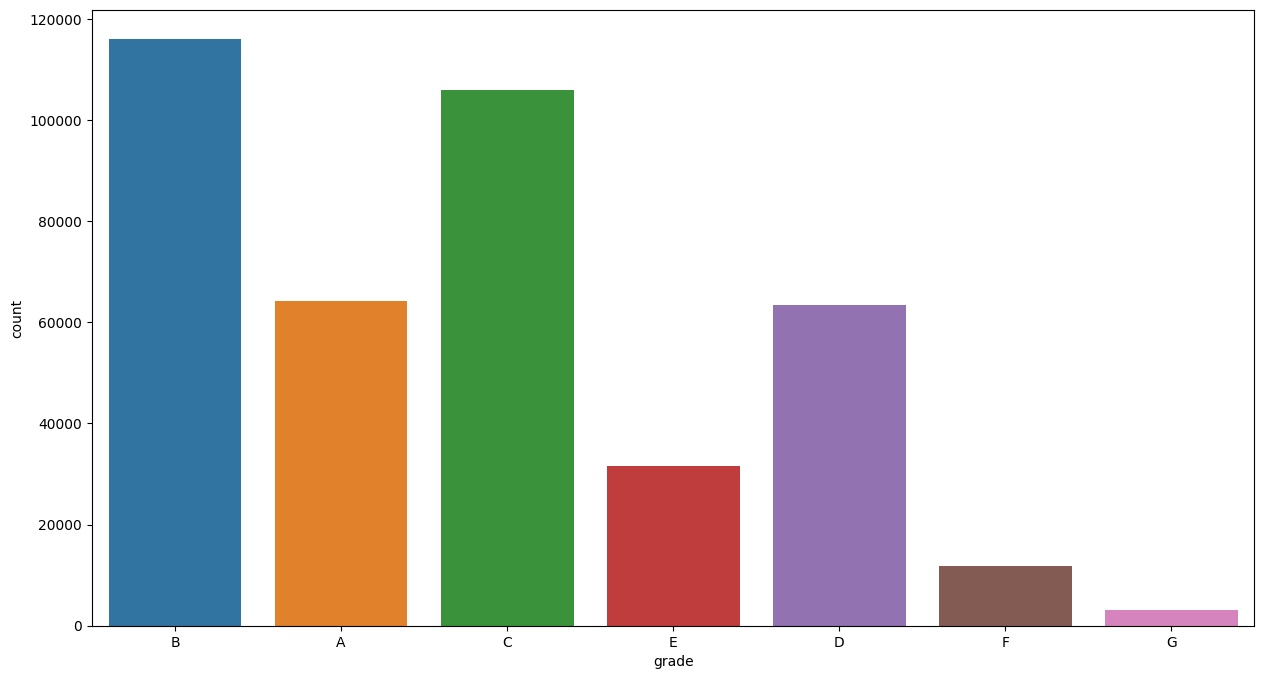

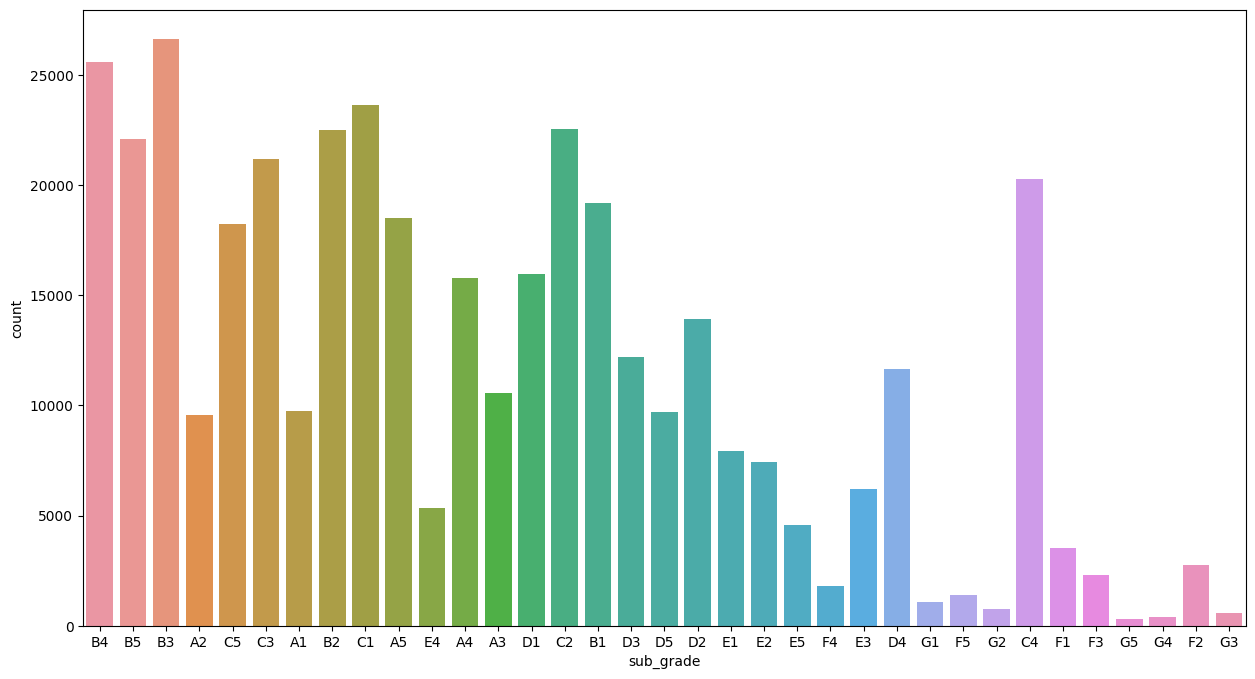

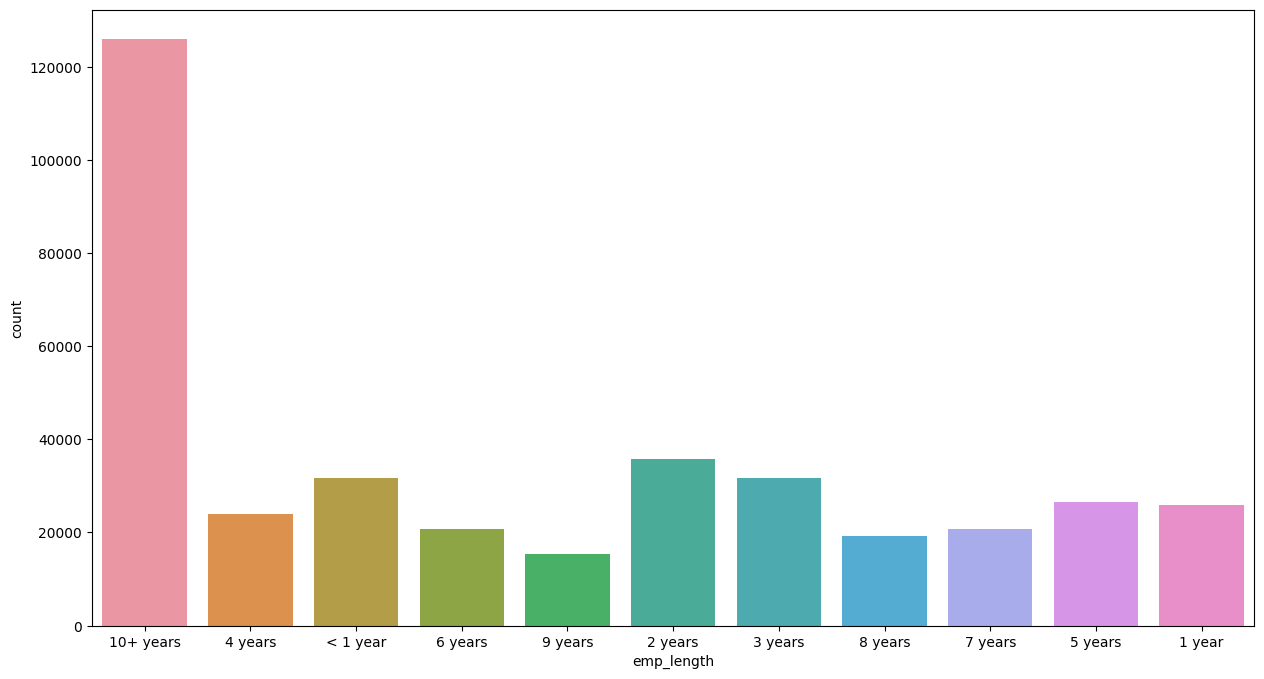

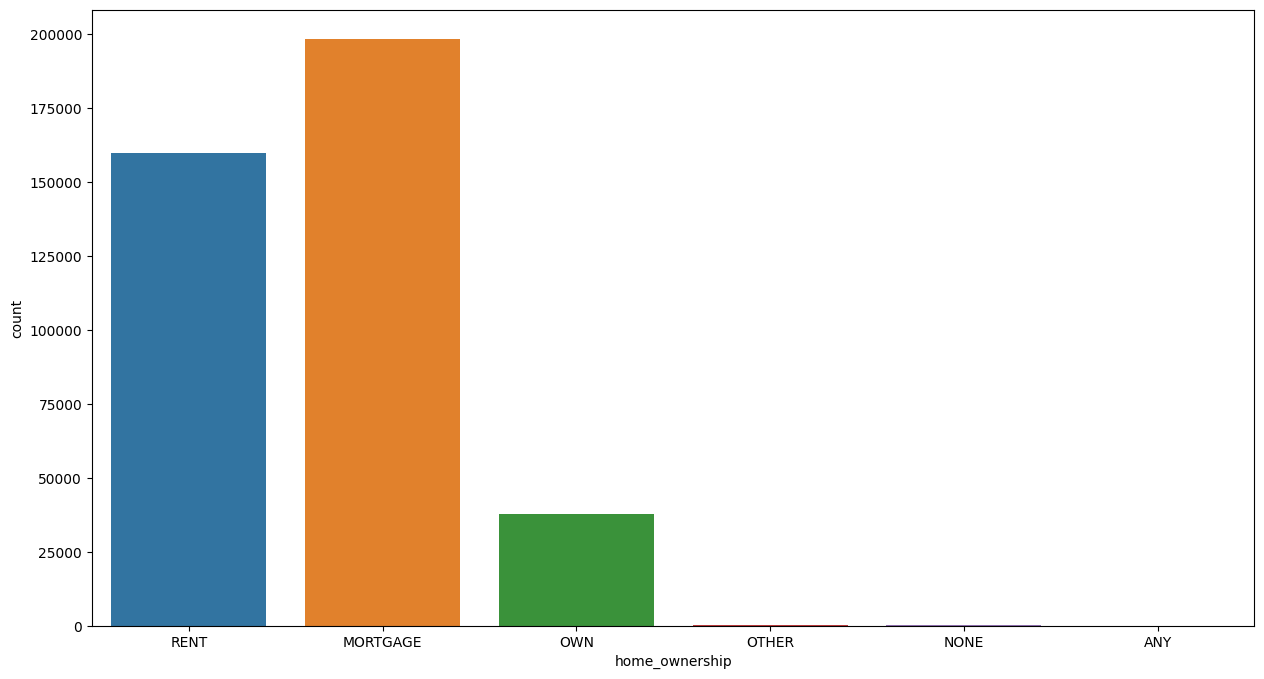

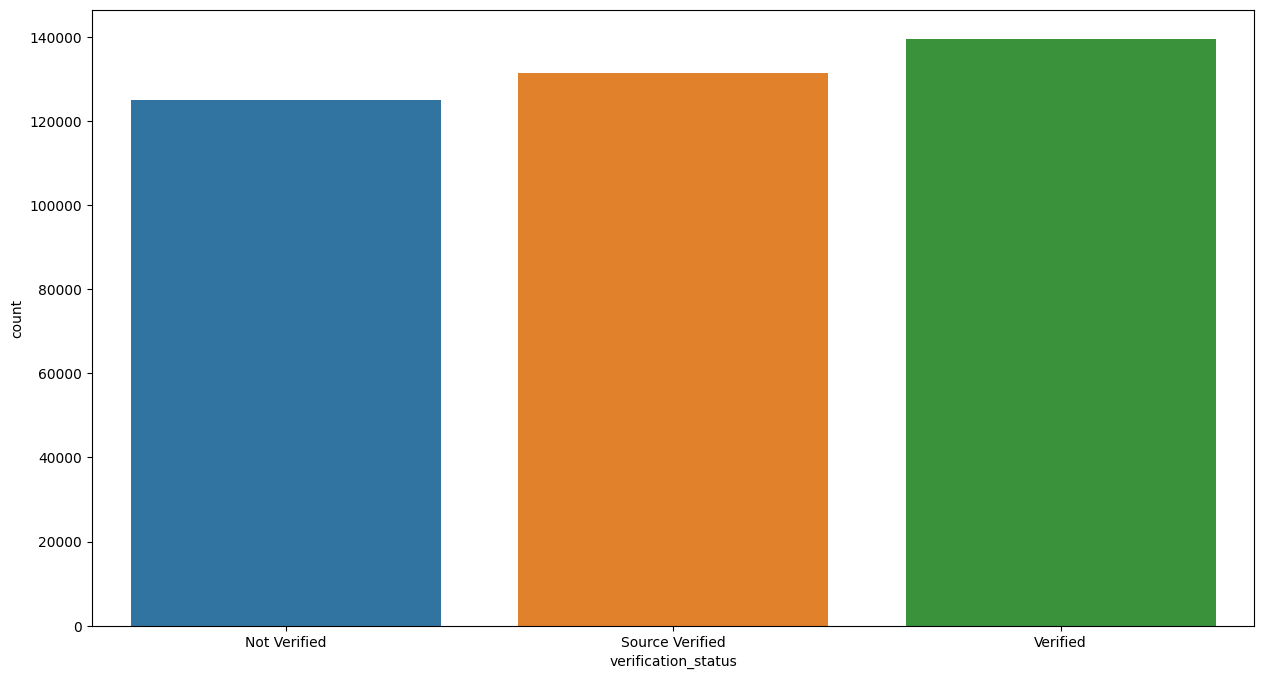

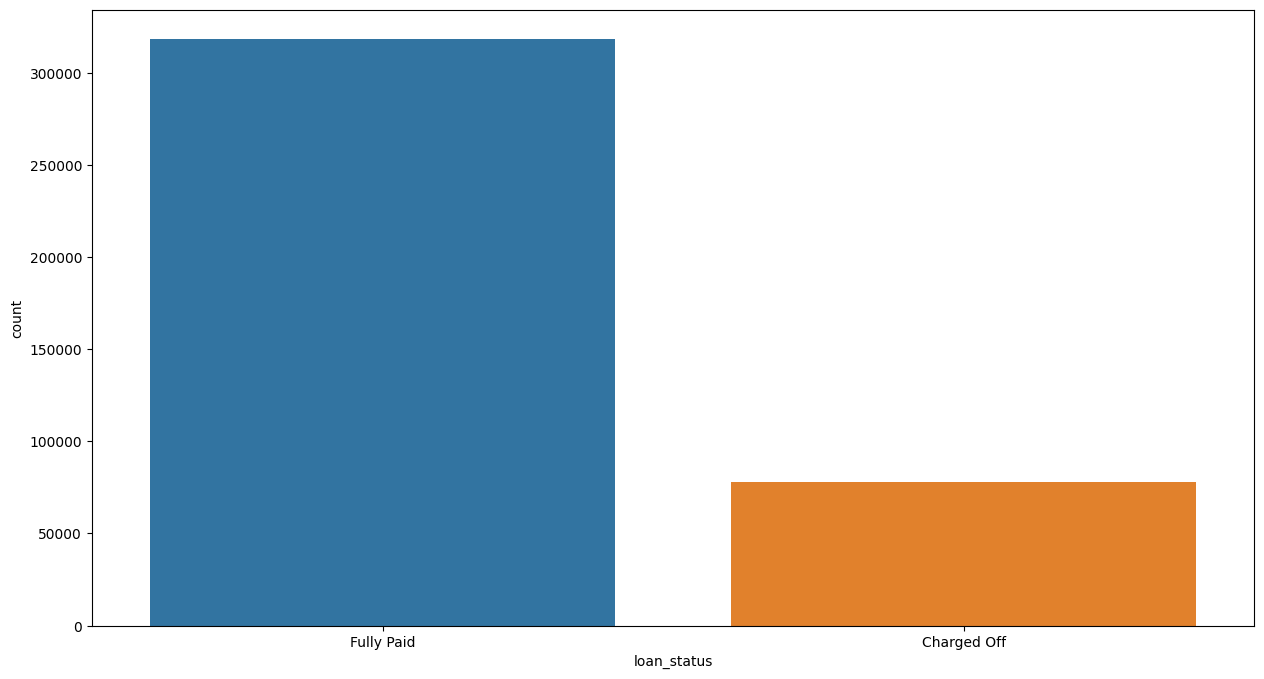

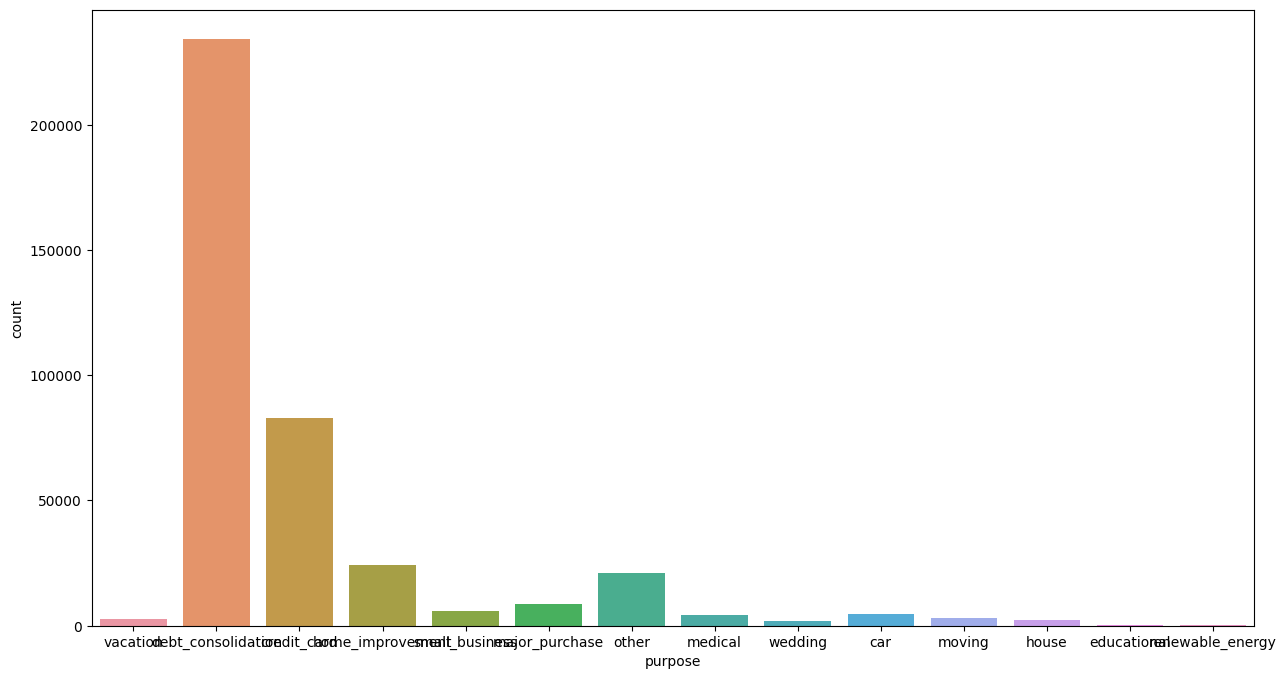

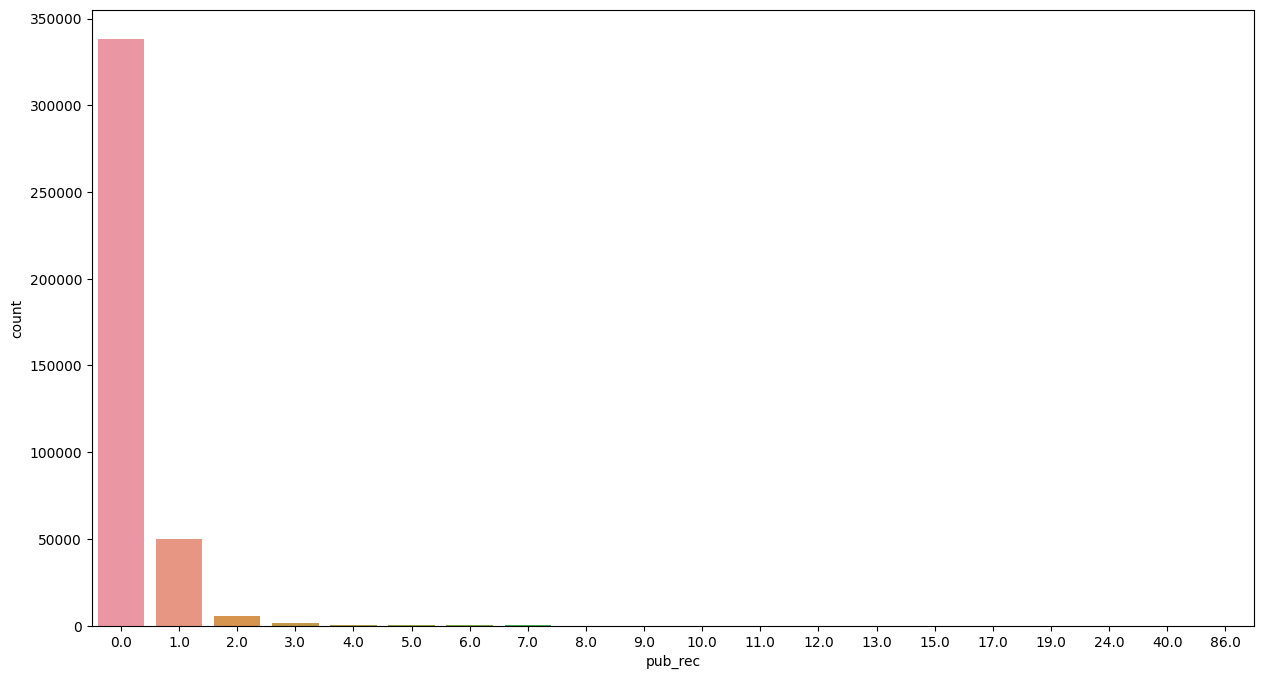

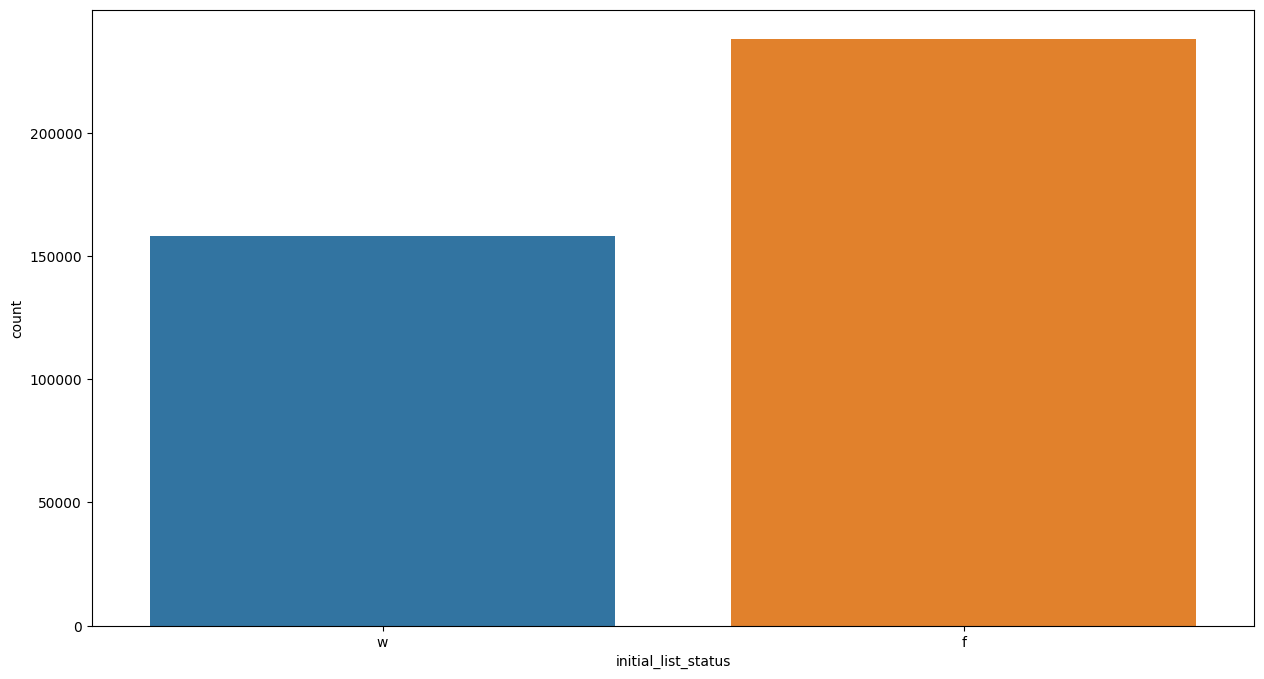

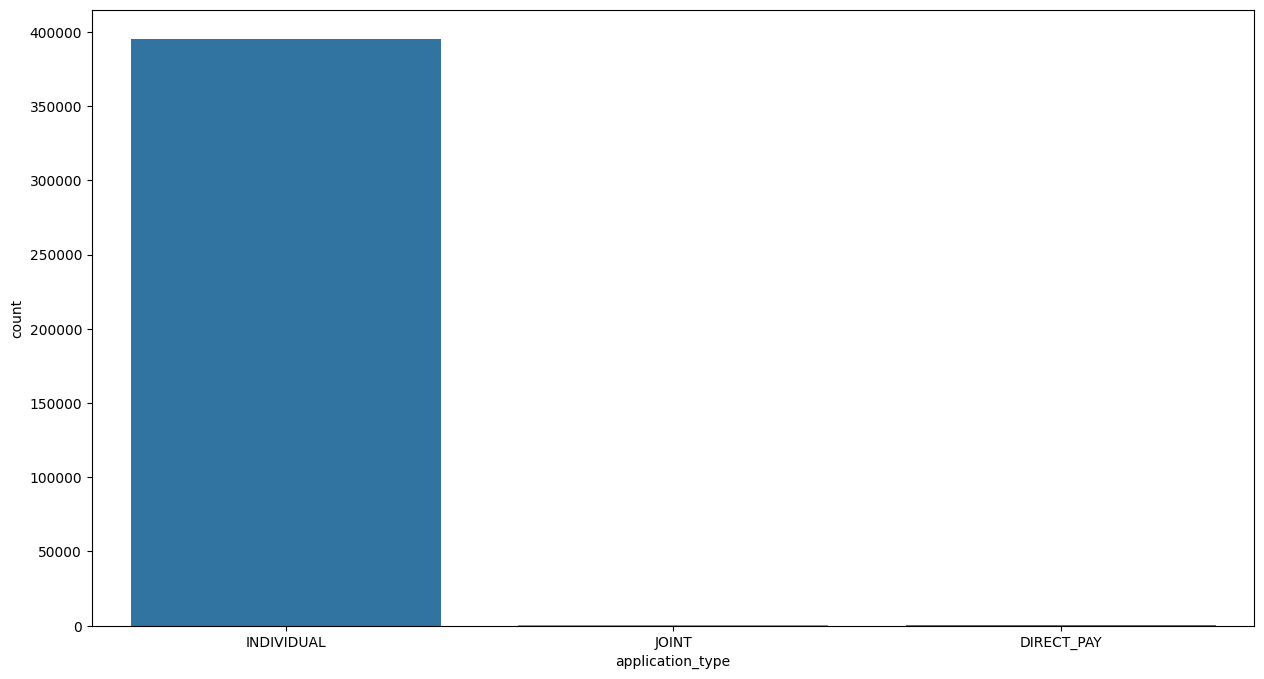

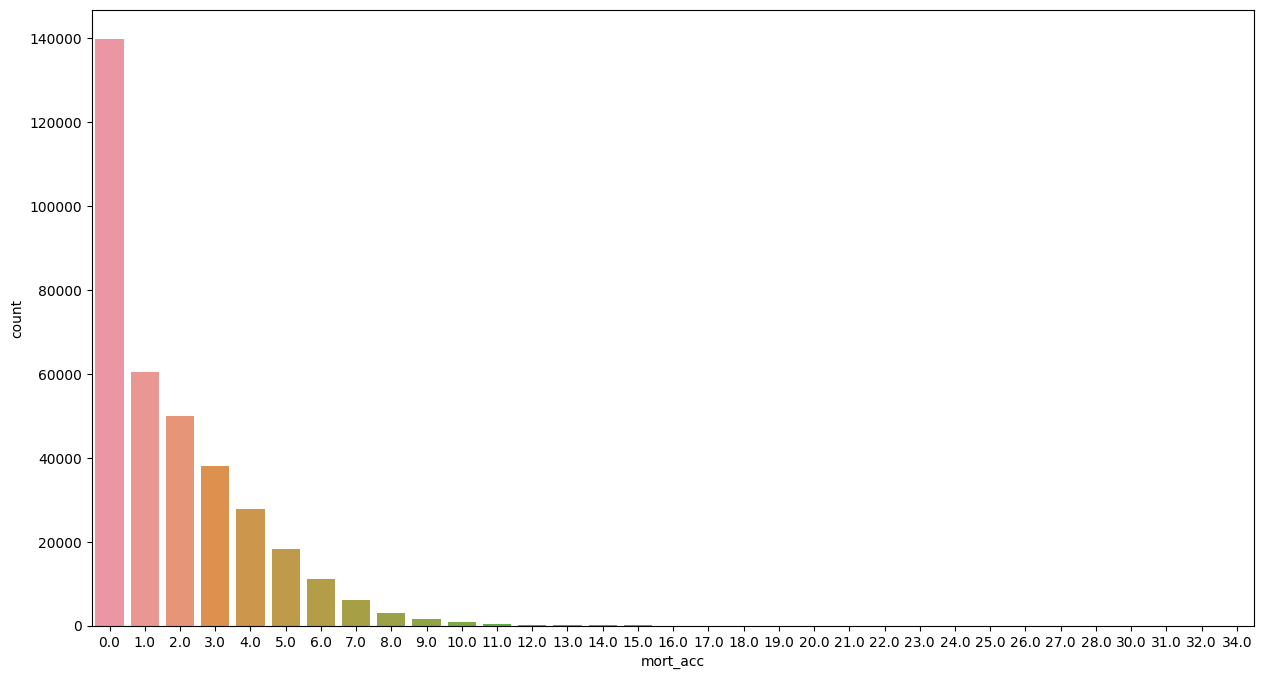

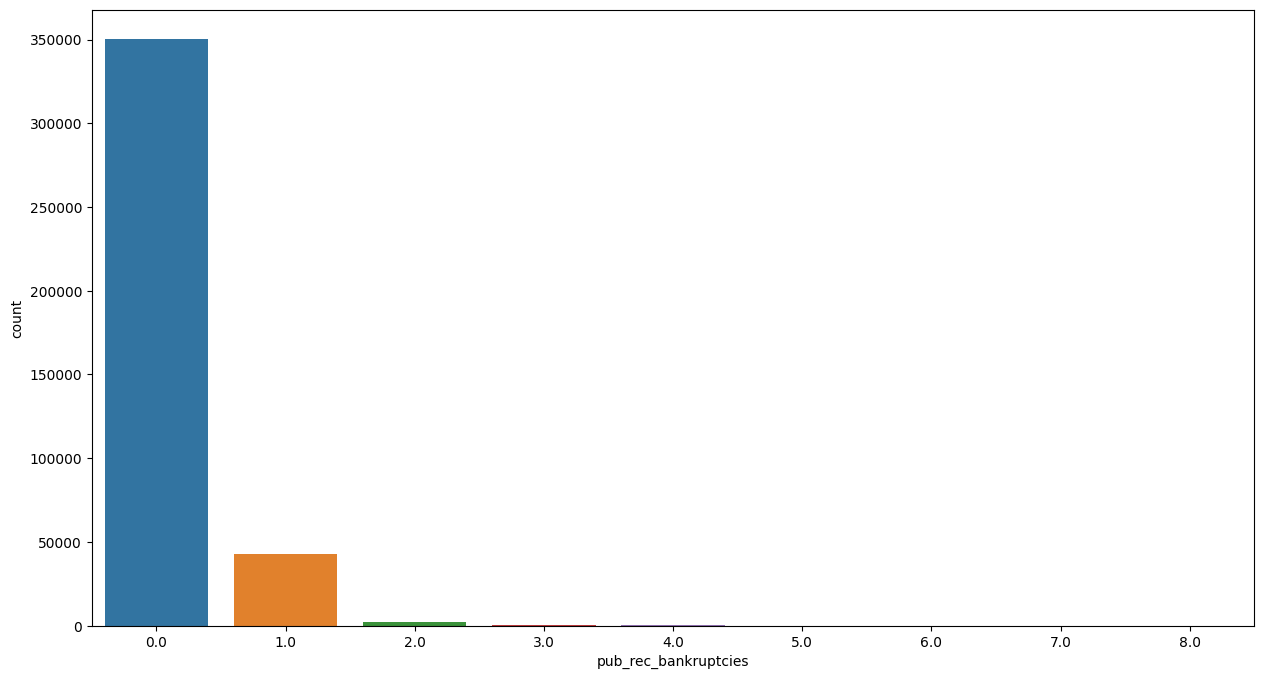

In [15]:
for i in cat_data:
    plt.figure(figsize=(15,8))
    sns.countplot(x=i,data=df)

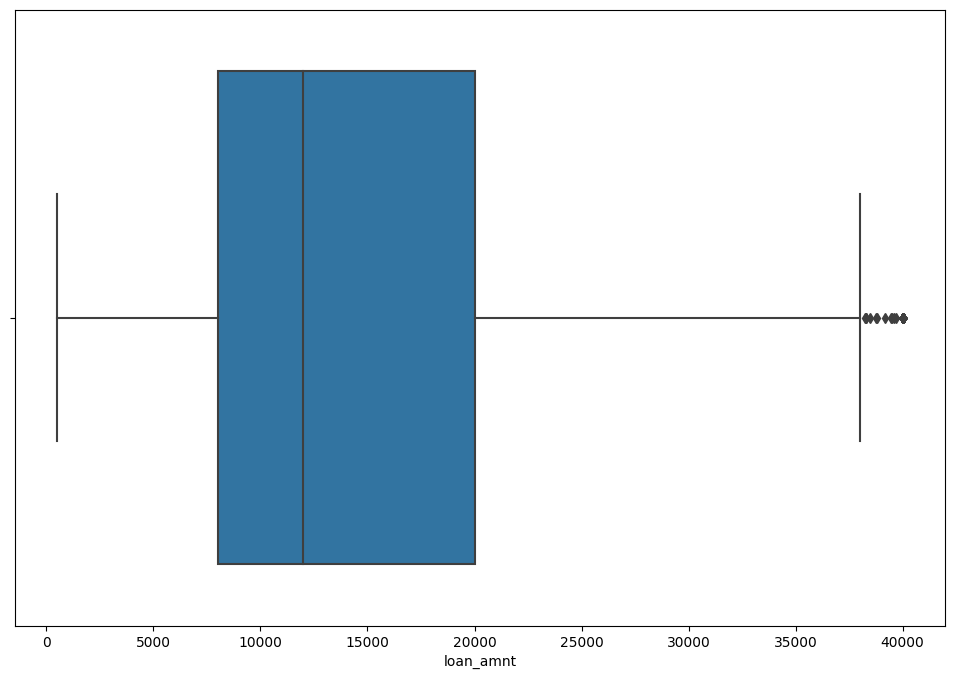

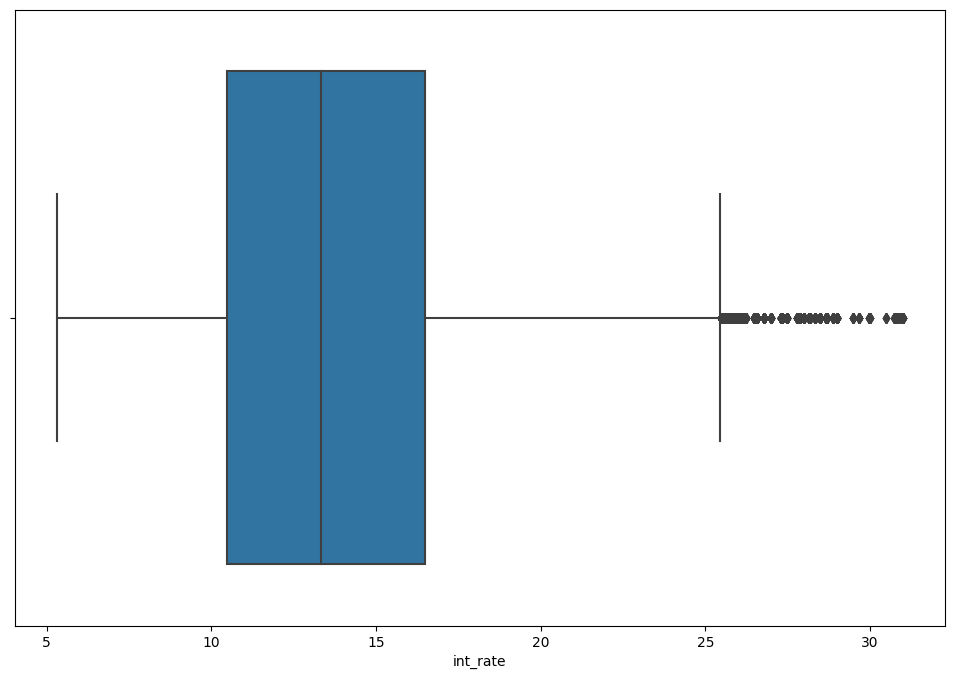

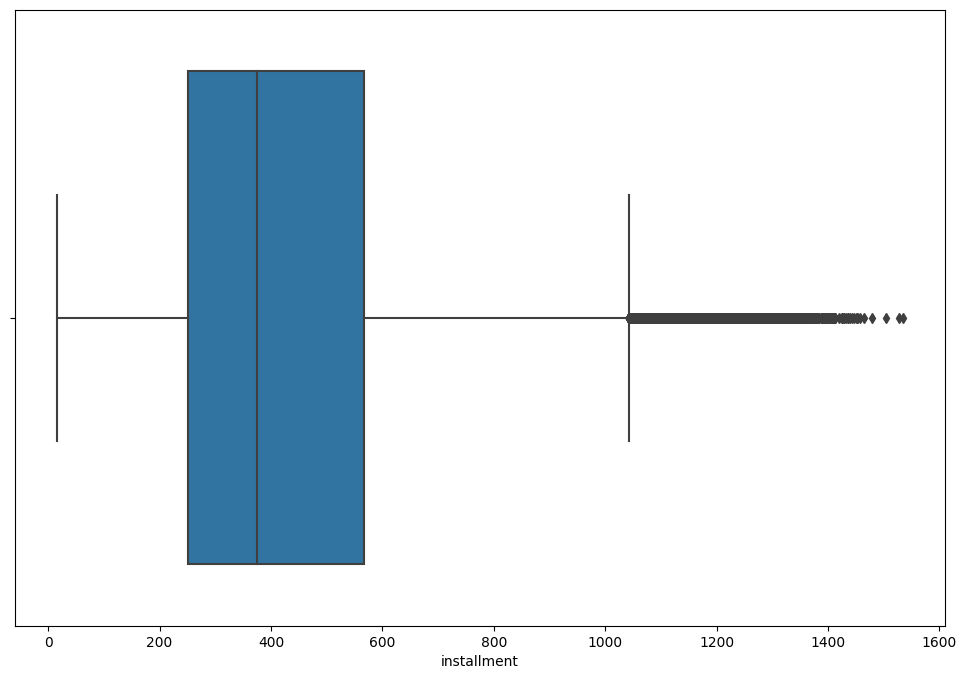

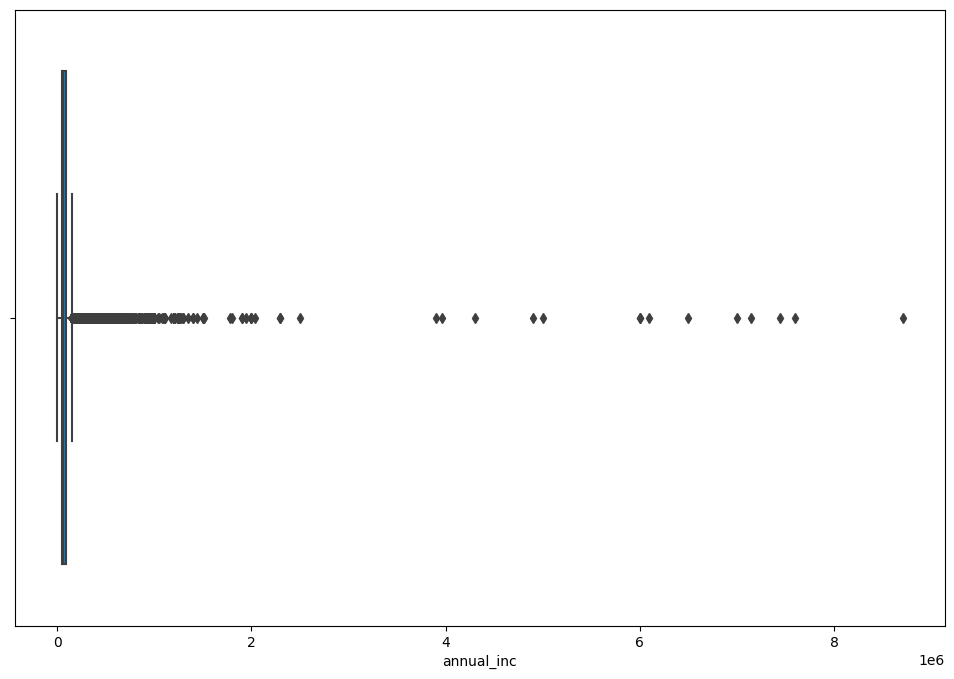

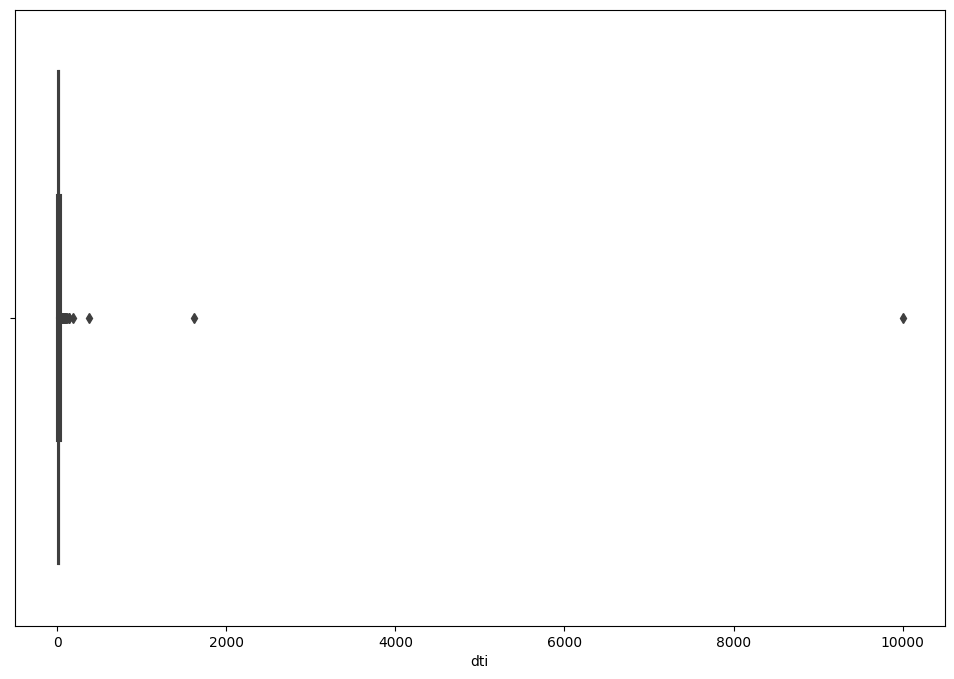

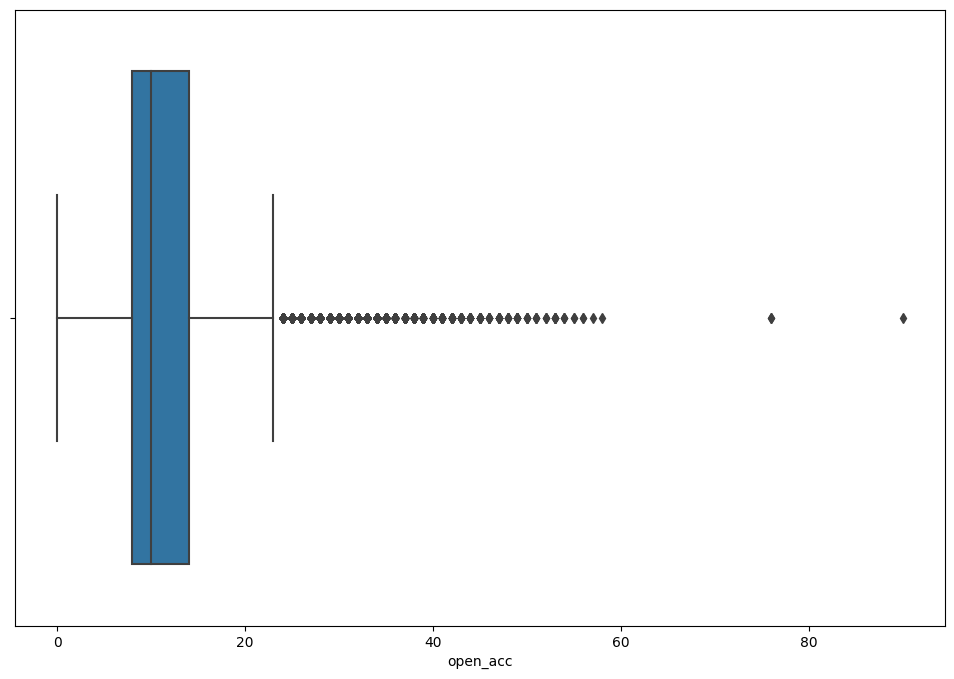

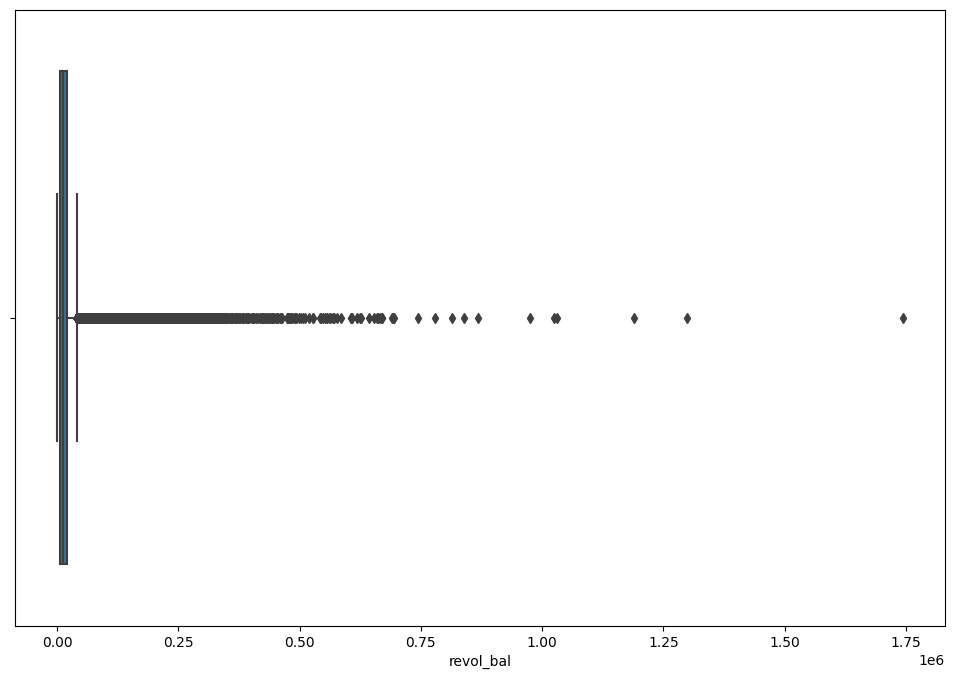

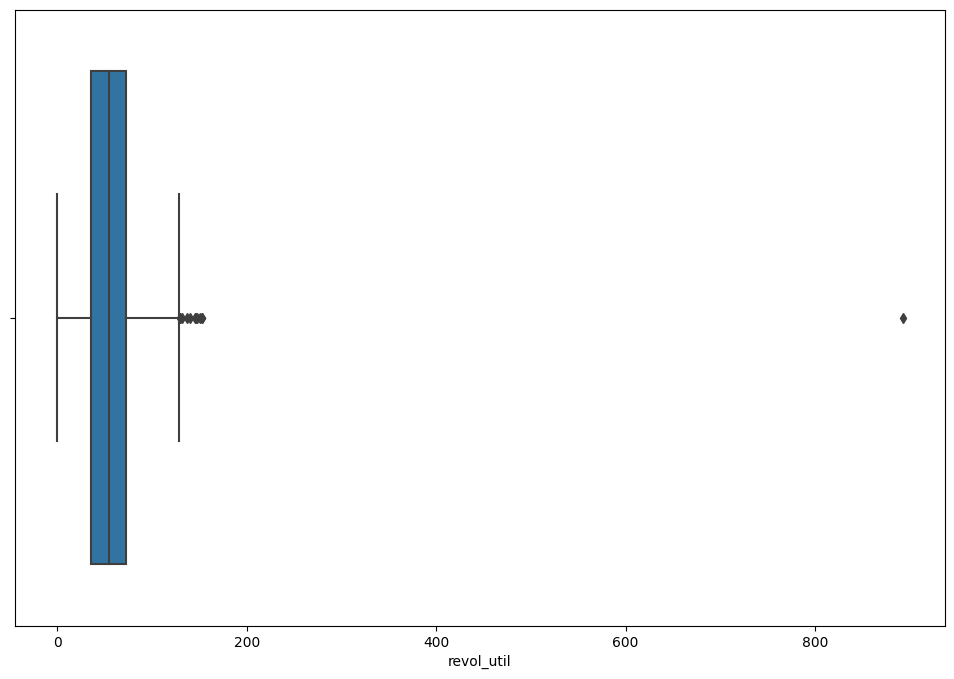

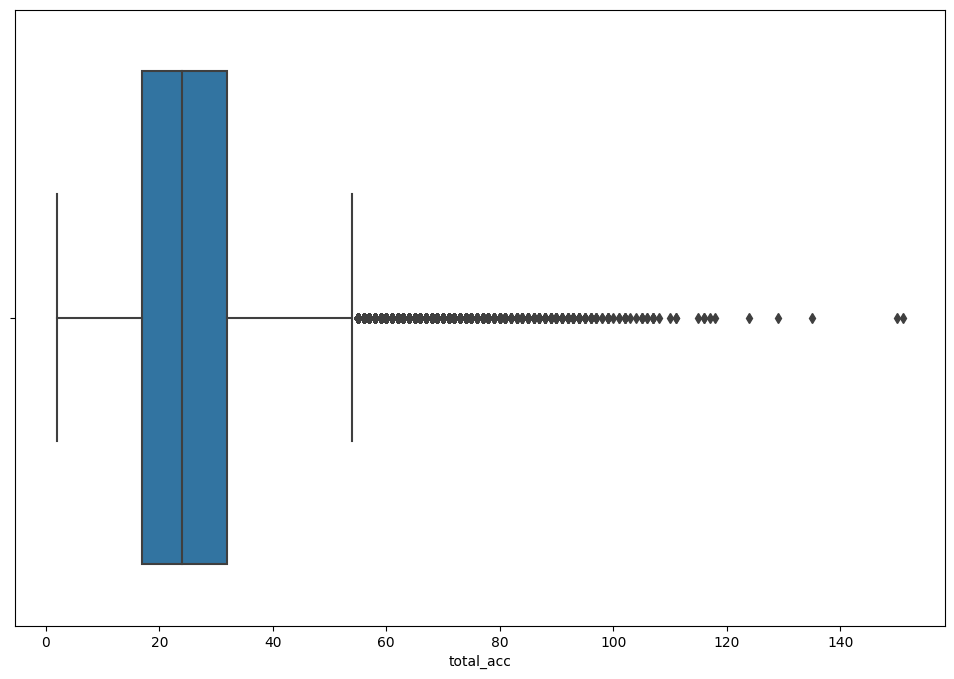

In [16]:
for i in num_data:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=i,data=df)

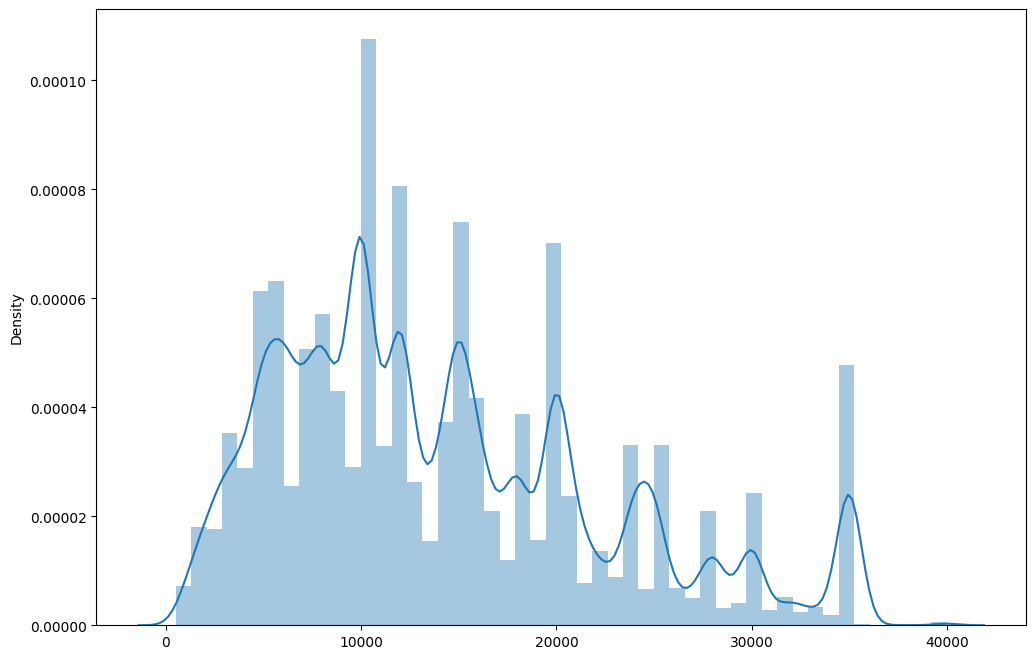

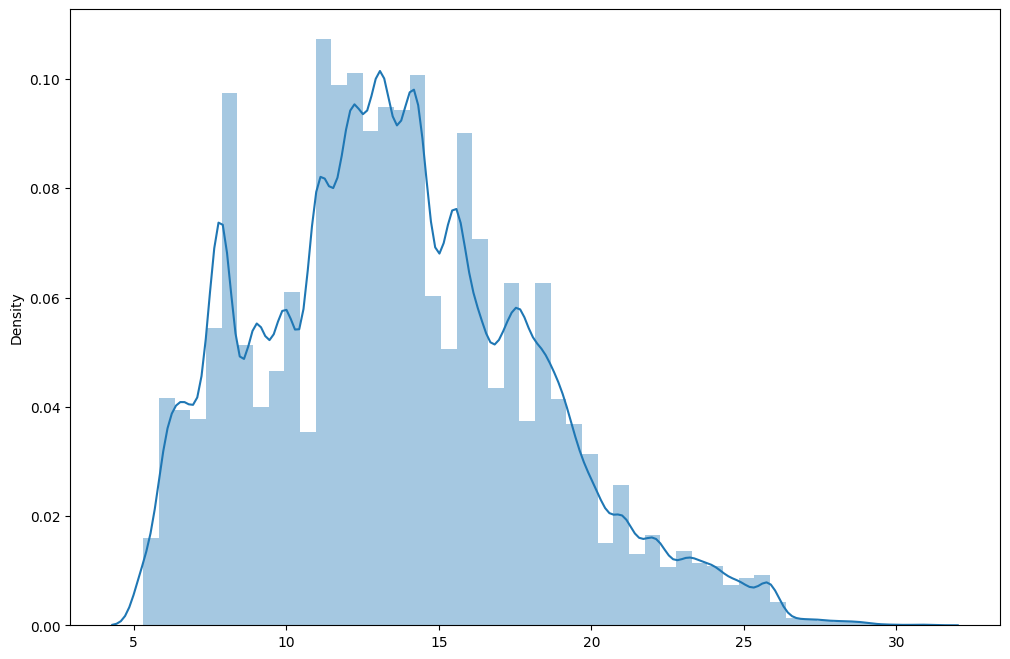

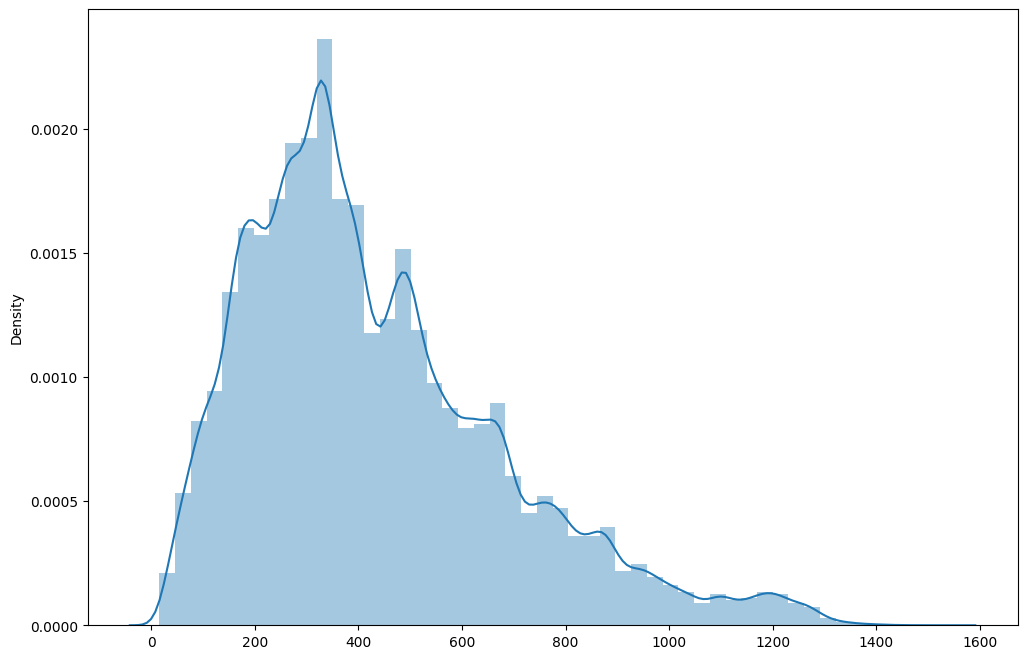

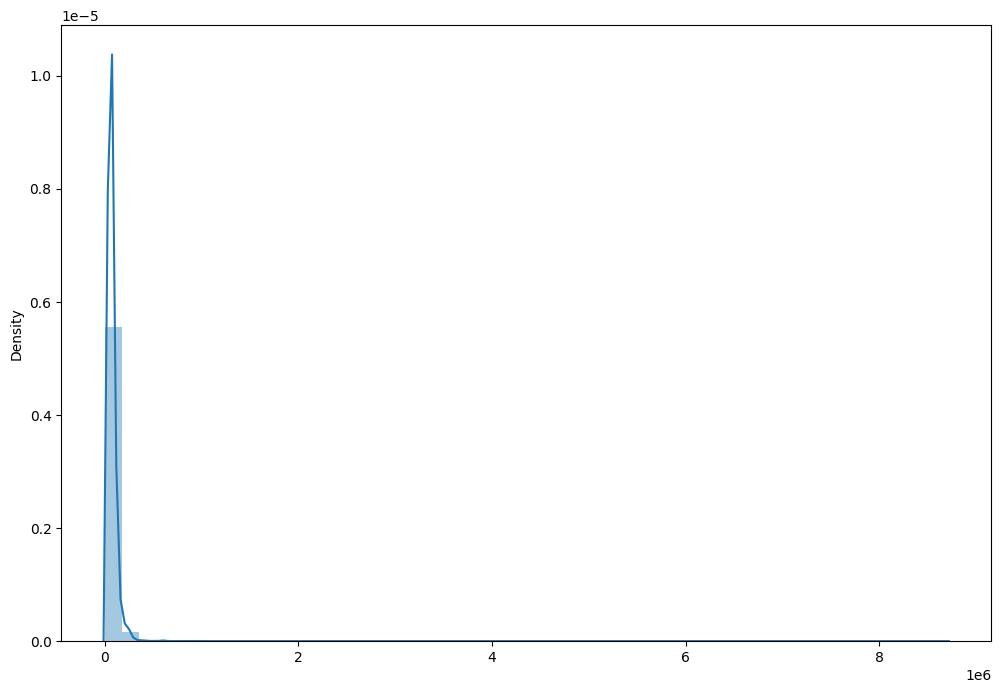

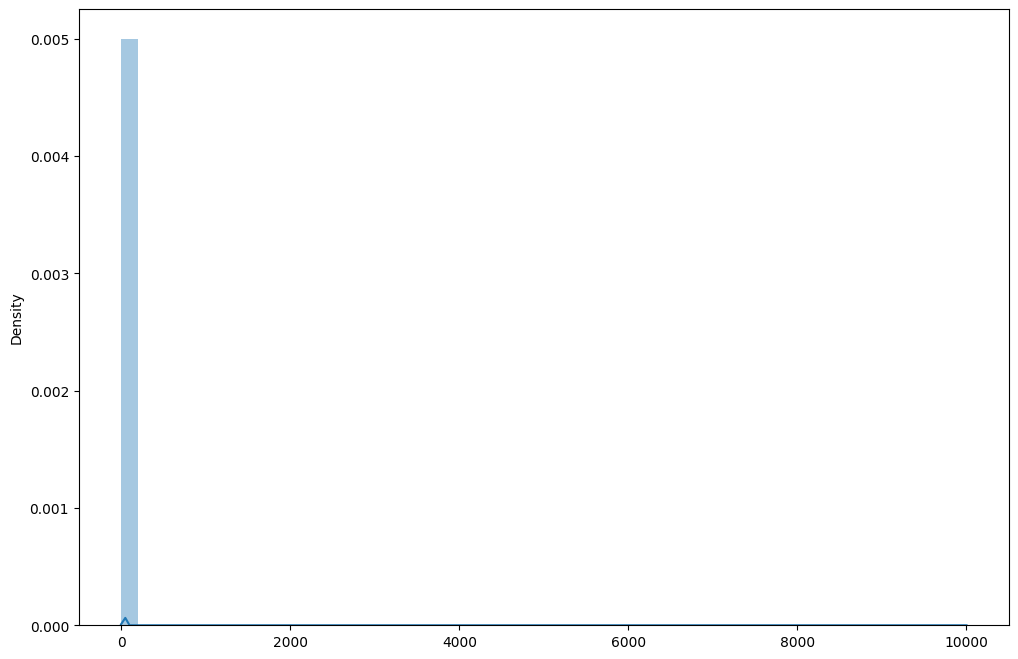

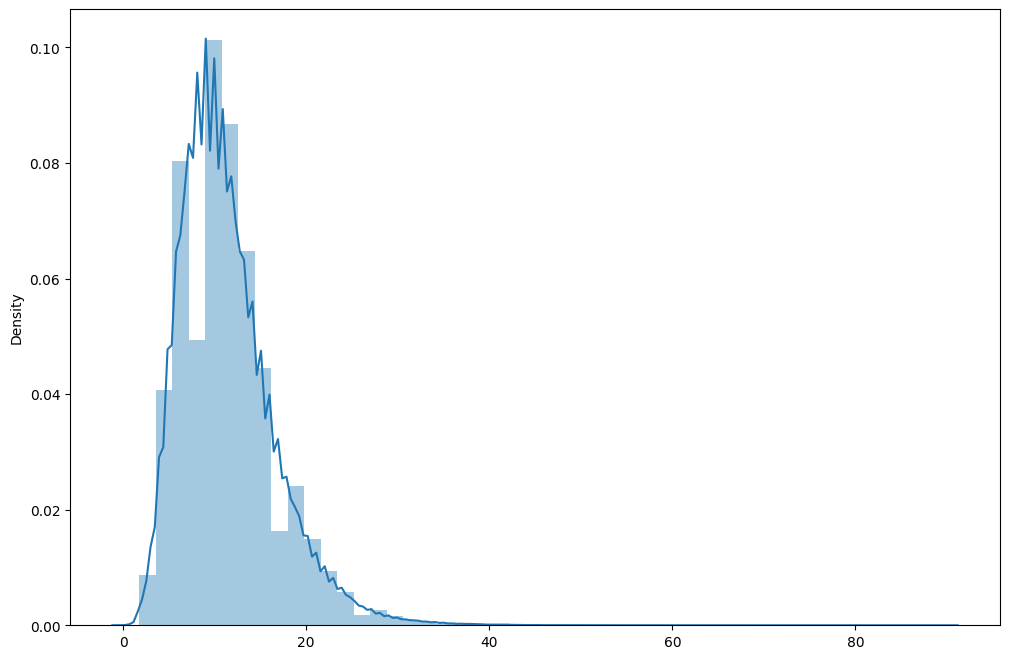

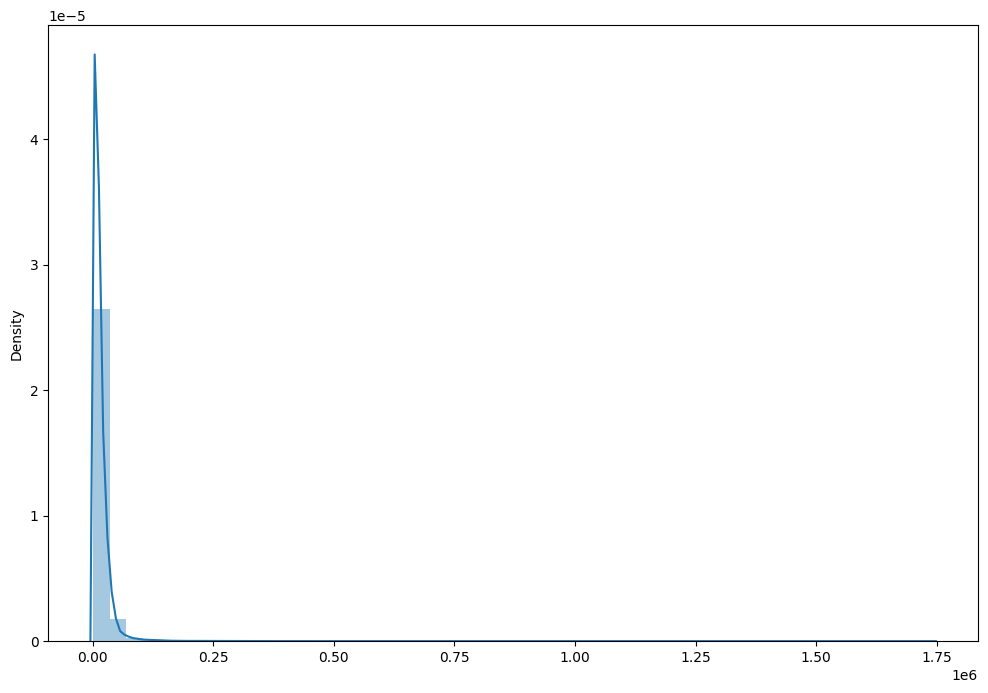

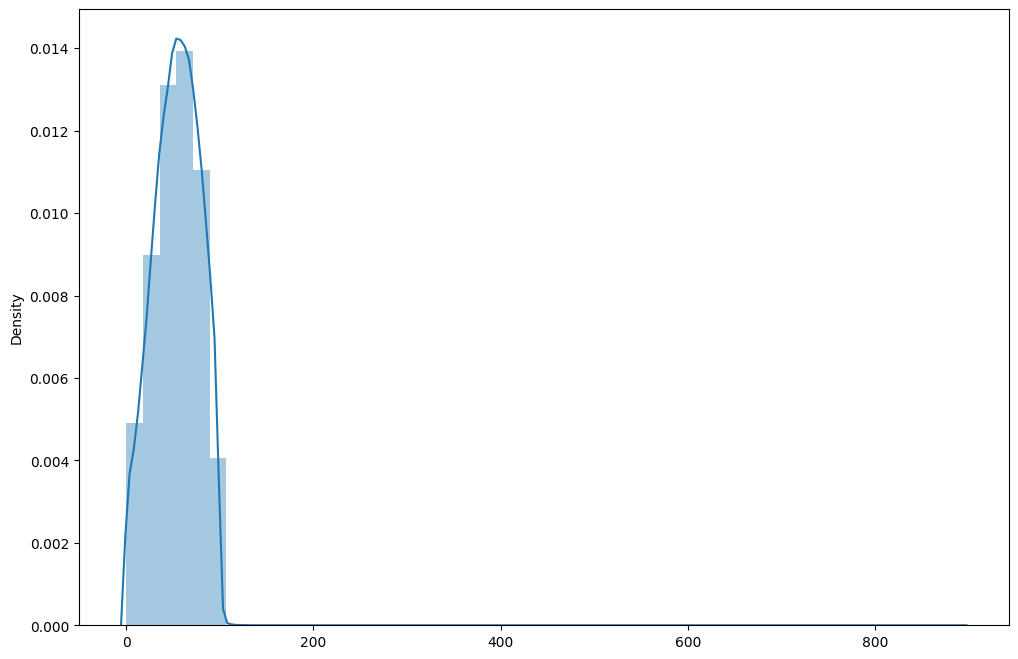

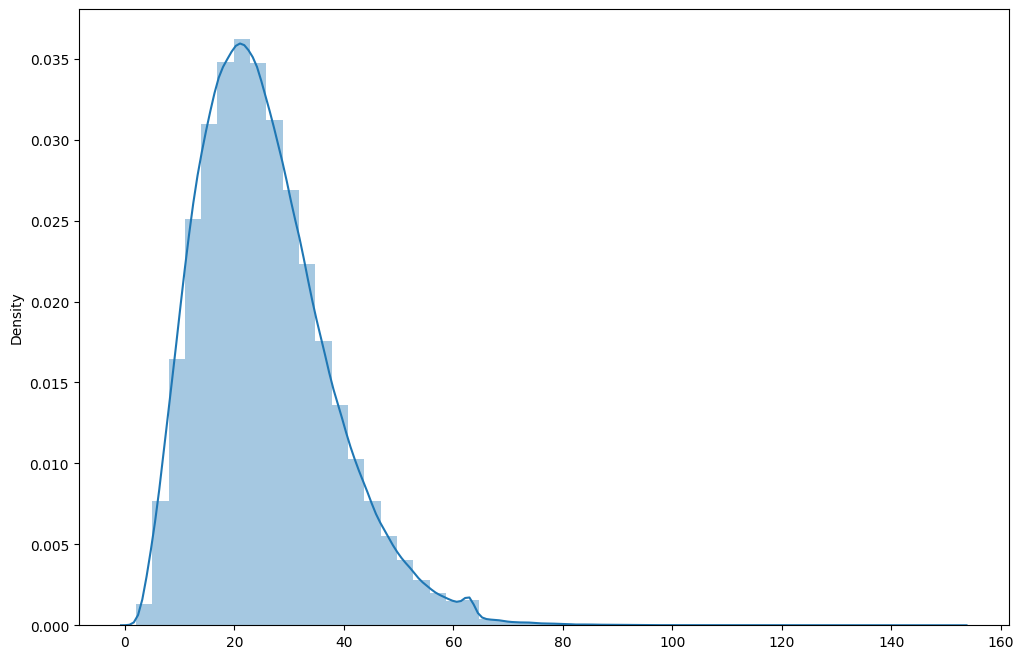

In [17]:
for i in num_data:
    plt.figure(figsize=(12,8))
    sns.distplot(x=df[i])

By doing univariate analysis following things can be analysed

* term column : more no of records for 36 months than 60 months
* grade: most of the records are having grade B ,then C and then almost same no of records A , D 
* home ownership: mainly morgatage then rent 
* verification status : records distributed for all 3 category
* emp_length: most records for 10+ year
* loan status: fully paid no. are more than charged off
* pub_rec, mort_acc, pub_rec_bankcruptices having most of the records with 0 value

* int_rate, revol_bal,total_acc,annual_inc, installments,open_acc have many outliers detected

### Bivariate analysis

<Axes: xlabel='loan_status', ylabel='int_rate'>

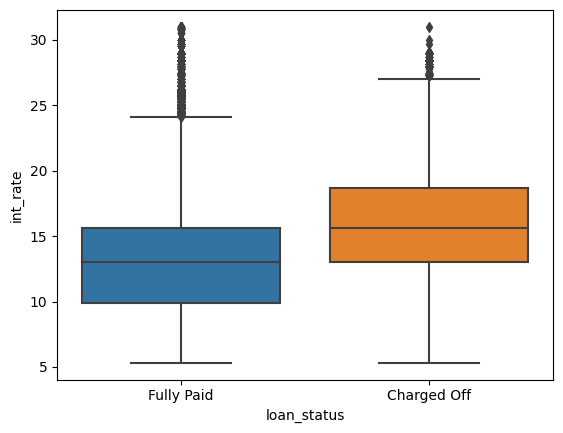

In [18]:
sns.boxplot(x='loan_status',y='int_rate',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

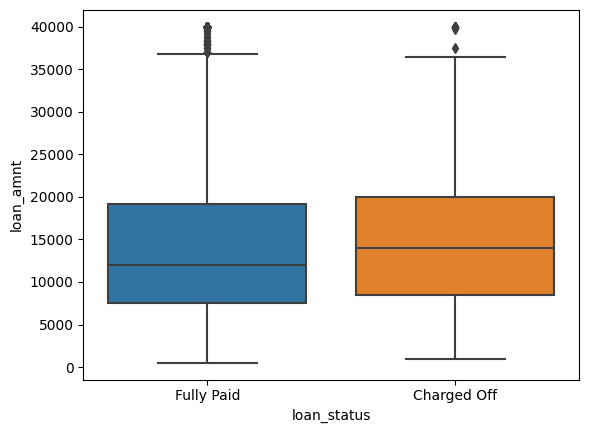

In [19]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='dti'>

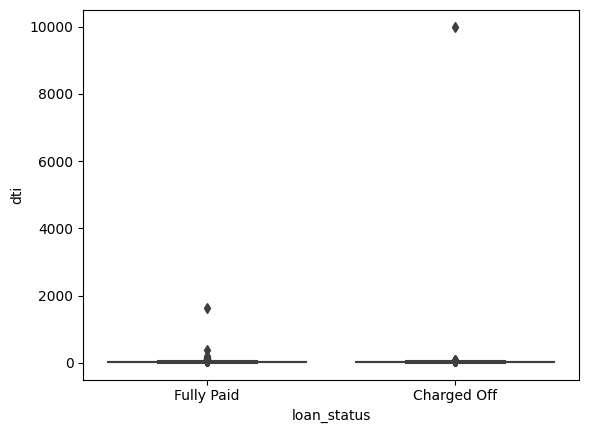

In [20]:
sns.boxplot(x='loan_status',y='dti',data=df)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

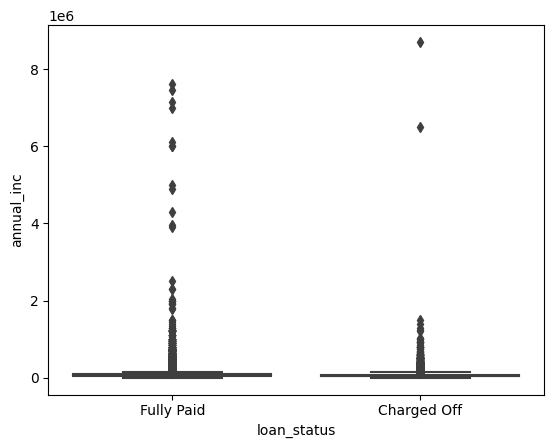

In [21]:
sns.boxplot(x='loan_status',y='annual_inc',data=df)

<Axes: xlabel='loan_status', ylabel='installment'>

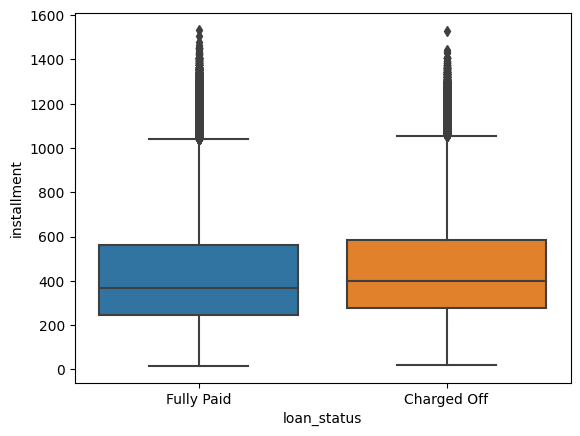

In [22]:
sns.boxplot(x='loan_status',y='installment',data=df)

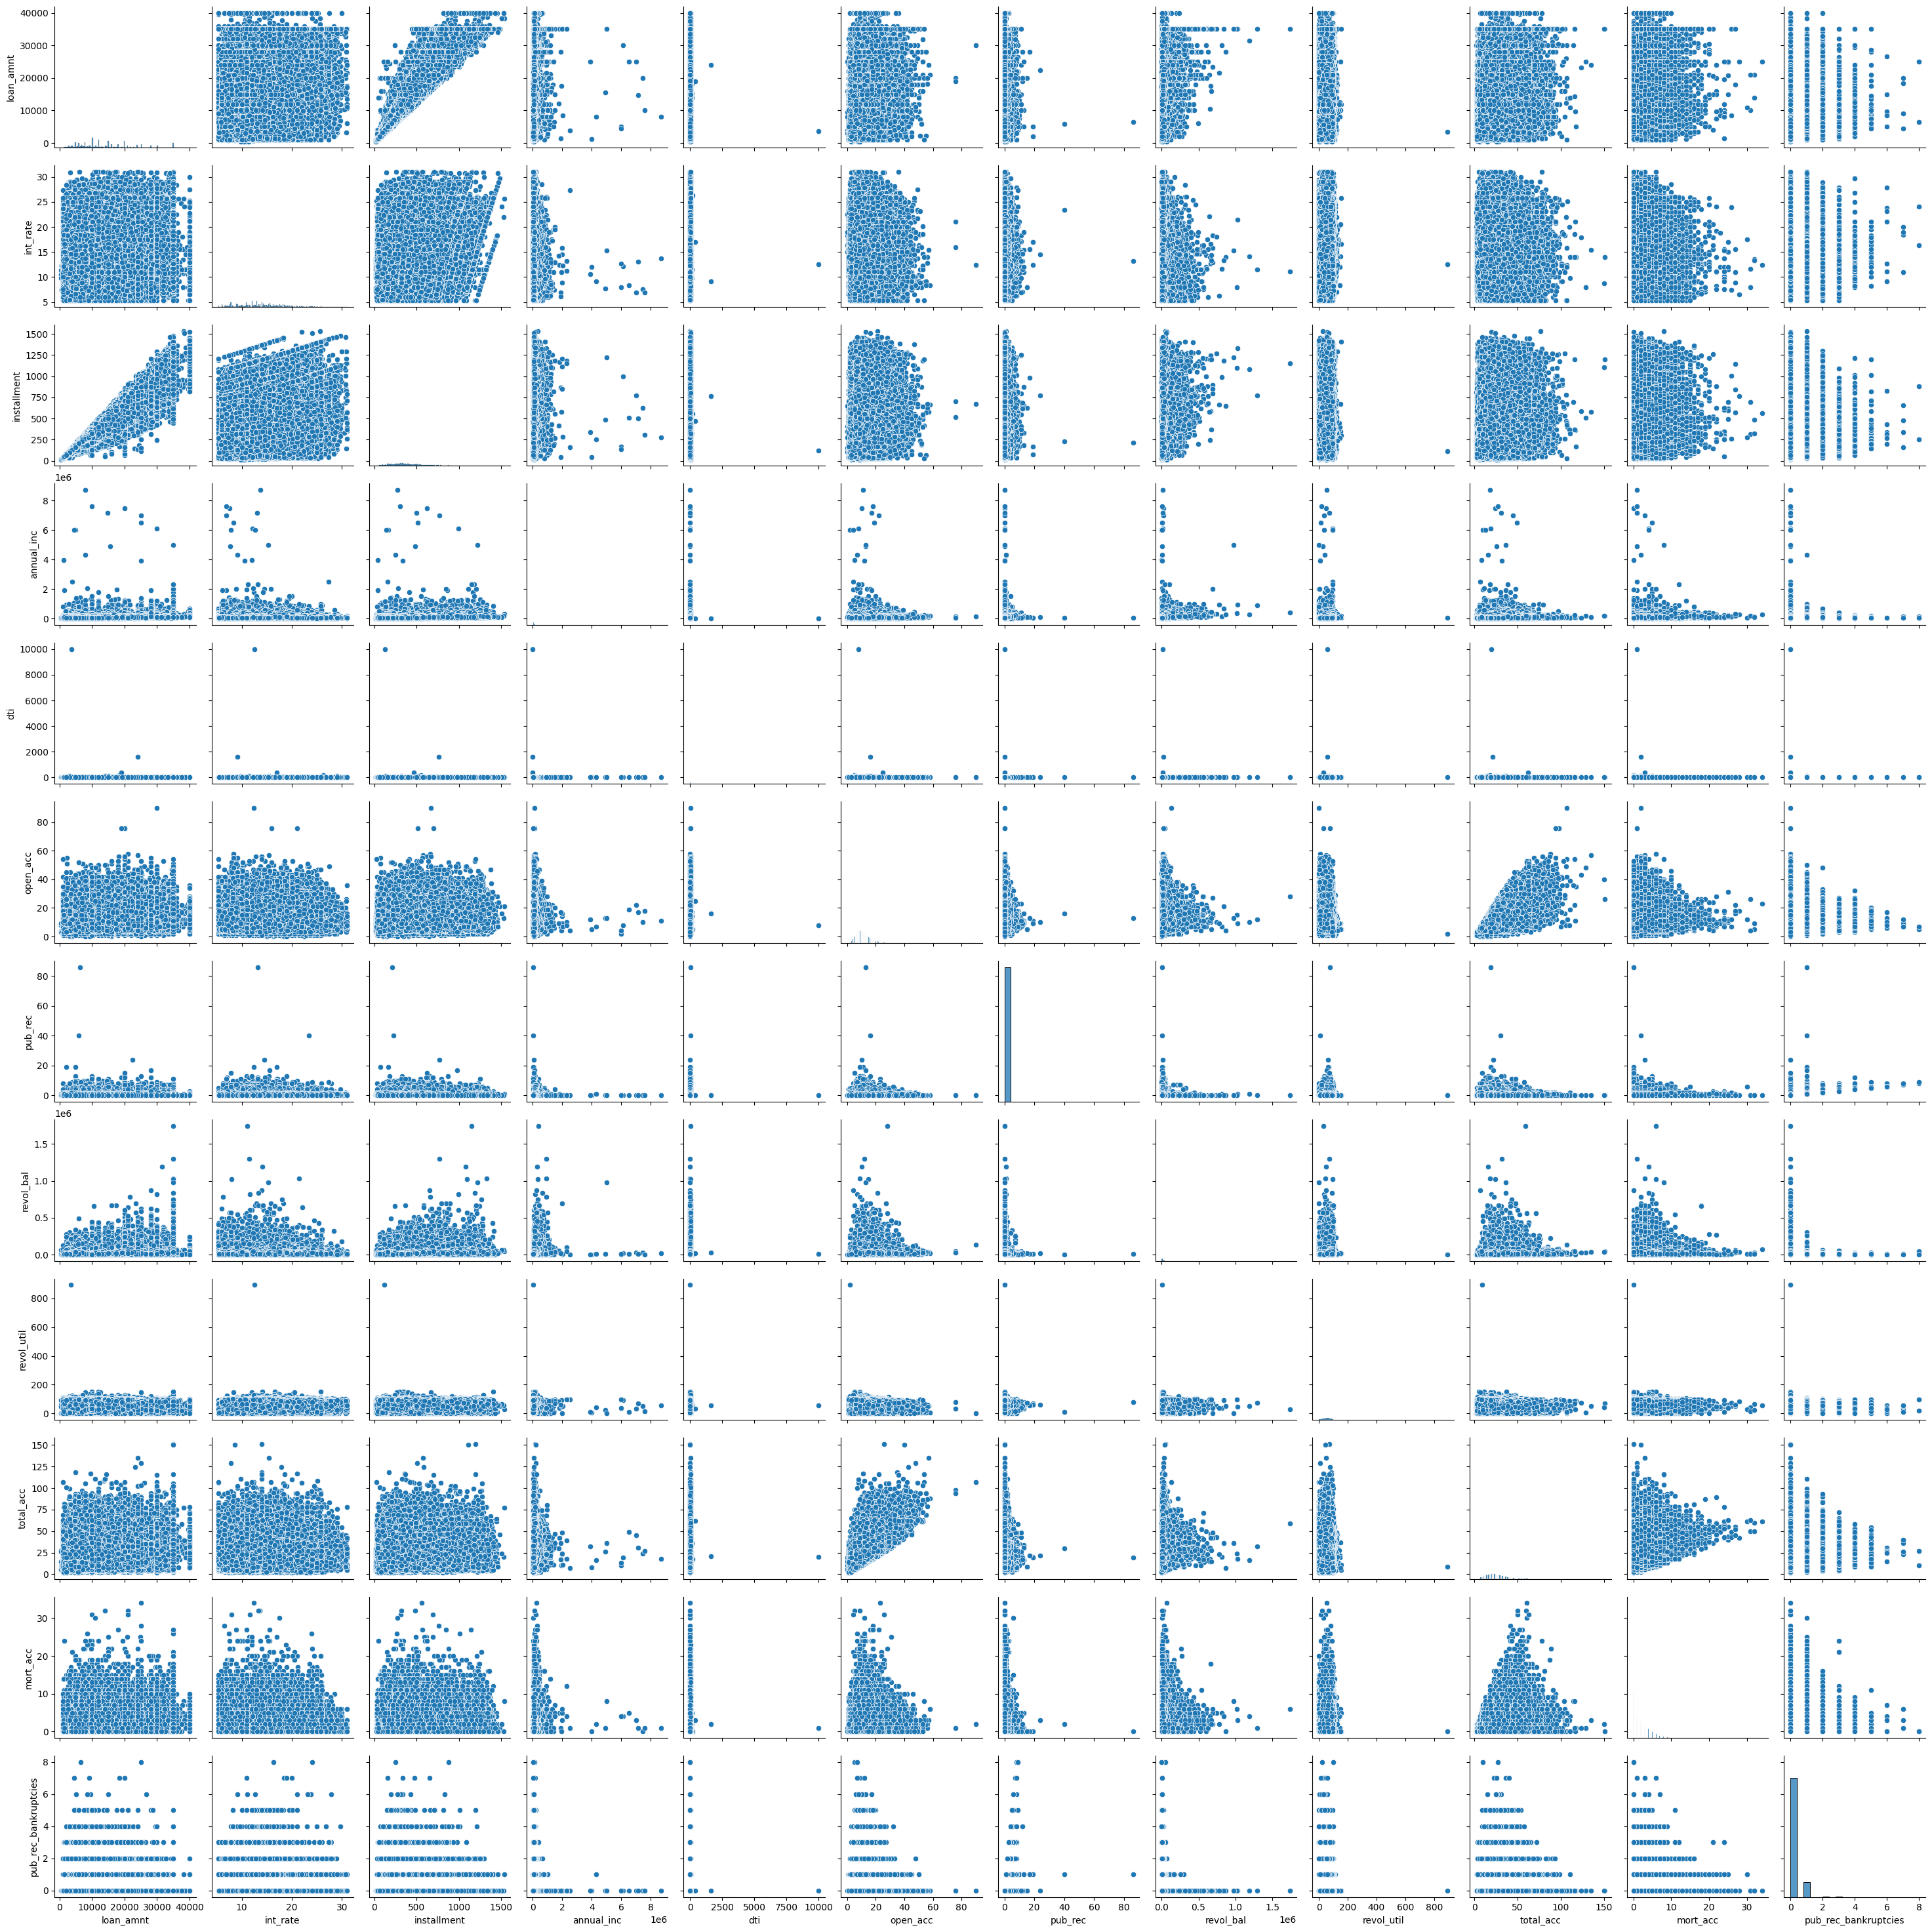

In [23]:
sns.pairplot(data=df)

<Axes: xlabel='loan_amnt', ylabel='installment'>

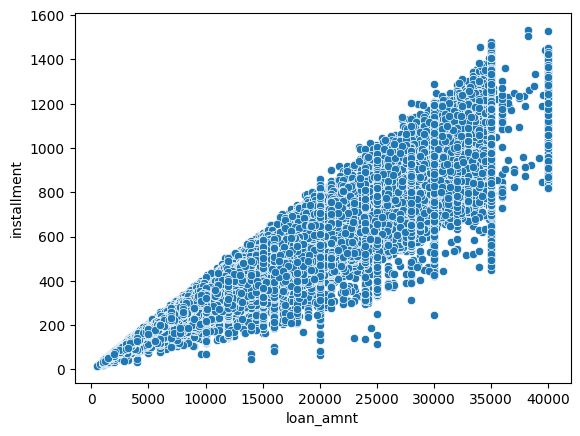

In [24]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<Axes: xlabel='total_acc', ylabel='open_acc'>

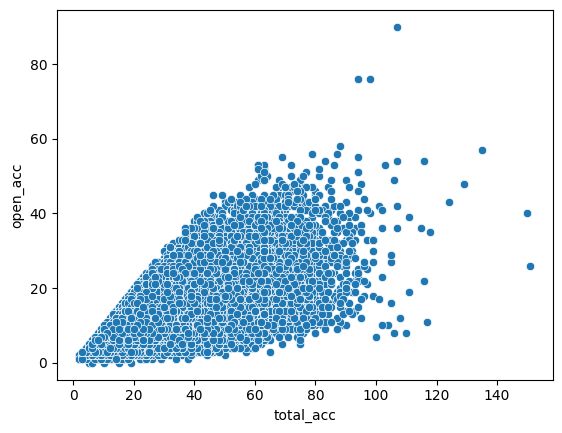

In [25]:
sns.scatterplot(x='total_acc',y='open_acc',data=df)

In [26]:
df1=df.drop(labels=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','title','earliest_cr_line','initial_list_status','application_type','address'],axis=1)

<Axes: >

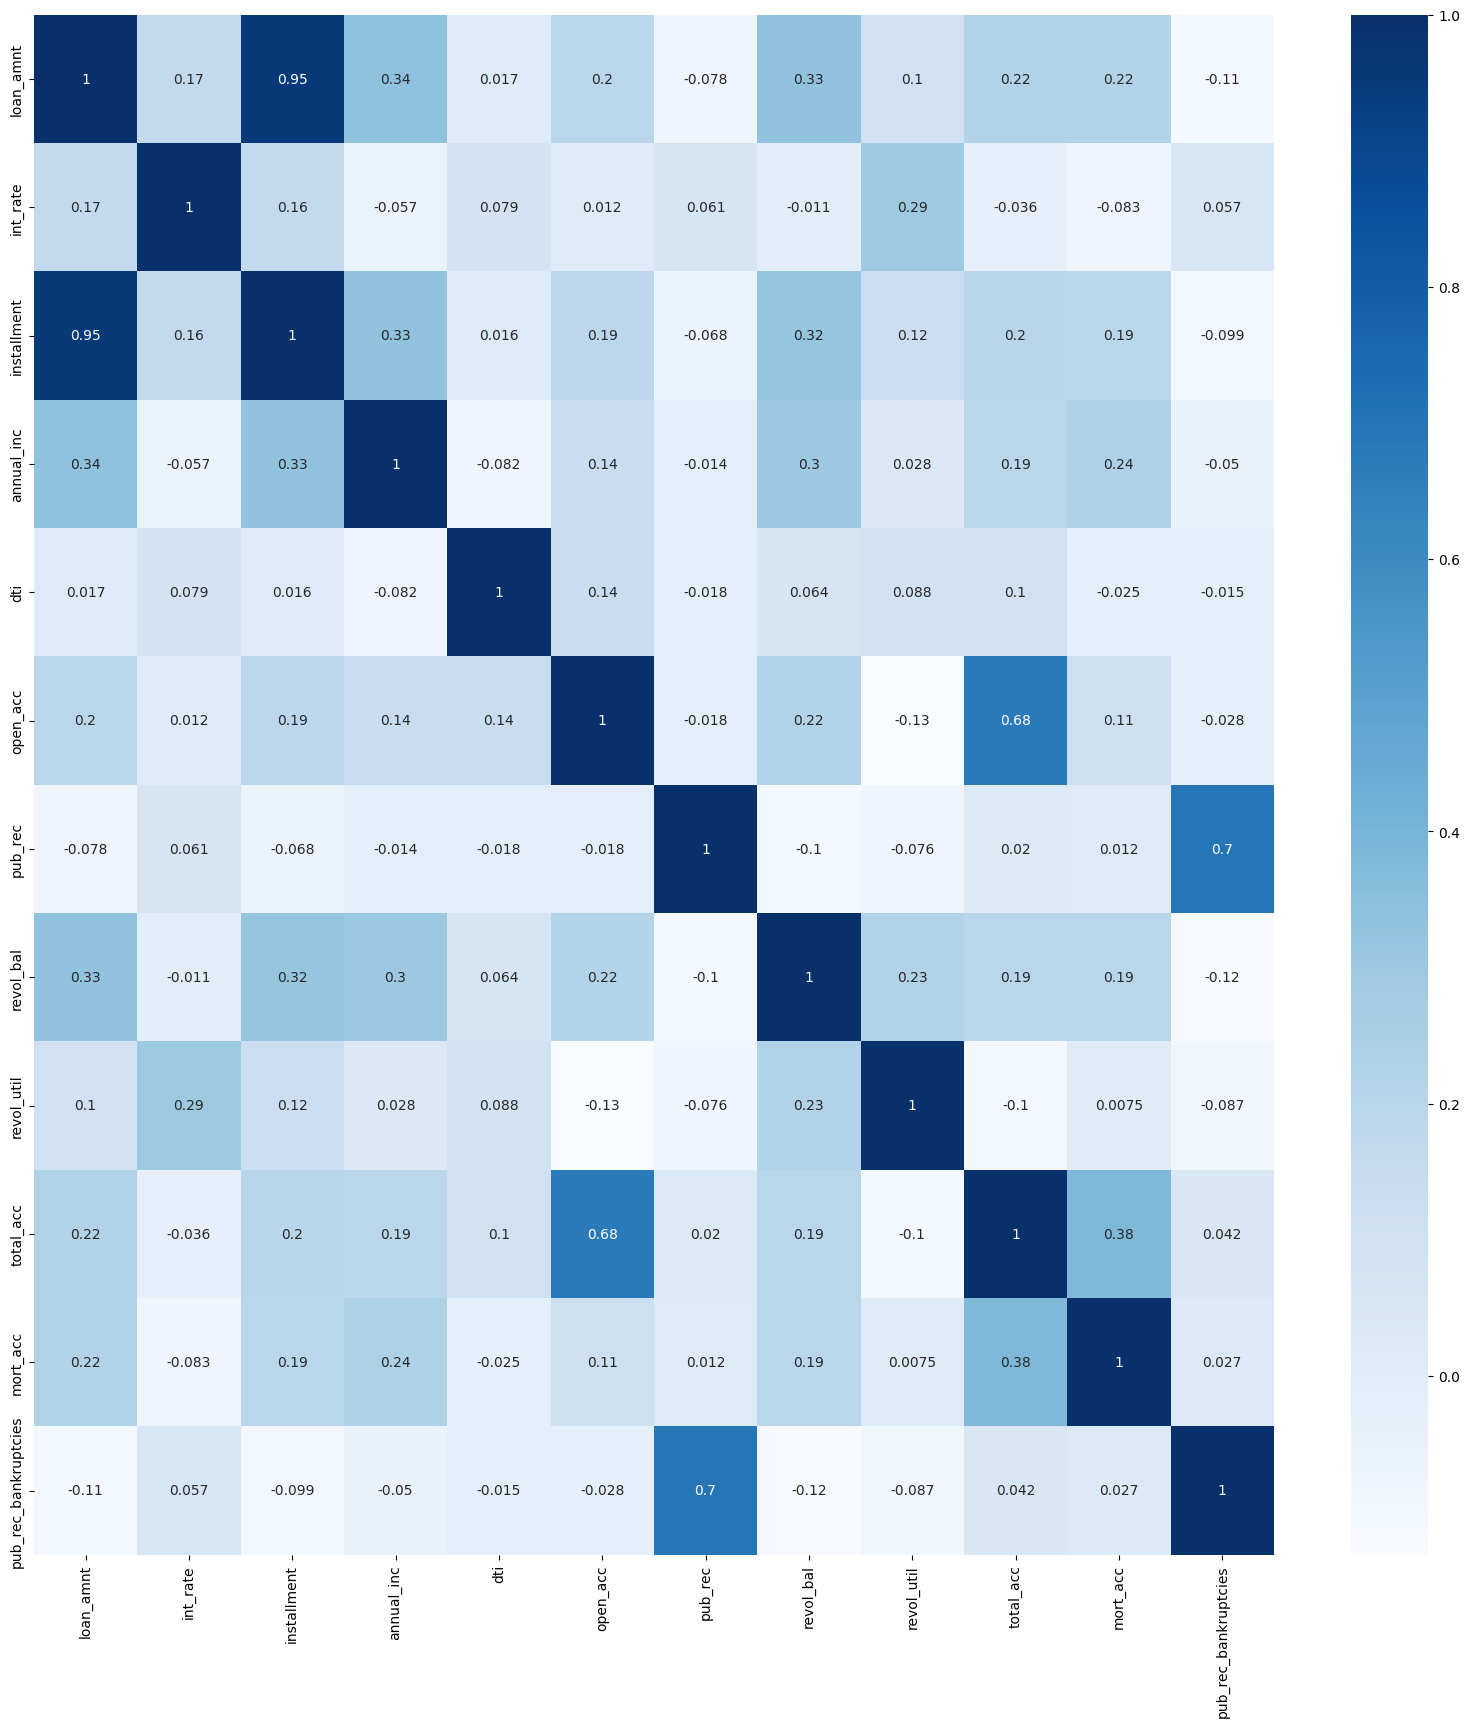

In [27]:
corr_mat=df1.corr()
plt.figure(figsize=(20,20))
corr_feature=corr_mat.index
sns.heatmap(df1[corr_feature].corr(),annot=True,cmap='Blues')

* Installment and loan amount are highly corelated to each other
* open_acc and total_acc also somewhat corelated with each other

### Data Preprocessing

### 1. checking duplicate values

In [28]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Length: 396030, dtype: bool

In [29]:
df.drop_duplicates()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


* dataset has no duplicate rows

### 2. missing value treatment

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

* we dont require emp_title, emp_length,title columns for train our data set, though we can treat missing values 

In [6]:
df['emp_title']=df['emp_title'].replace(np.nan,df['emp_title'].mode()[0])

In [7]:
df['emp_title'].isnull().sum()

0

In [8]:
df['emp_title']=df['emp_title'].replace(np.nan,df['emp_title'].mode()[0])
df['emp_length']=df['emp_length'].replace(np.nan,df['emp_length'].mode()[0])
df['title']=df['title'].replace(np.nan,df['title'].mode()[0])

In [9]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [10]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

In [11]:
## creation of flags for columns pub_rec, mort_acc, pub_rec_bankruptcies

In [12]:
df['pub_rec'].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [13]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [14]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [15]:
df['pub_rec']=df['pub_rec'].apply(lambda x : 1 if x>1 else 0)

In [16]:
df['pub_rec'].value_counts()

pub_rec
0    388011
1      8019
Name: count, dtype: int64

In [17]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(lambda x : 1 if x>1 else 0)
df['mort_acc']=df['mort_acc'].apply(lambda x : 1 if x>1 else 0)

In [18]:
df['mort_acc'].value_counts()

mort_acc
0    237988
1    158042
Name: count, dtype: int64

In [19]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0    393705
1      2325
Name: count, dtype: int64

In [20]:
## missing value treatment for column mort_acc,pub_rec_bankruptcies

df['mort_acc']=df['mort_acc'].fillna(1)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(1)

* filling null value of mort_acc and pub_rec_bankruptcies with the "1" because "0" is greater in size

In [21]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### 3. Outlier Treatment

In [22]:
numerical_data=df.select_dtypes(include='number')
num_cols=numerical_data.columns
for col in num_cols:
 mean=df[col].mean()
 std=df[col].std()
 
 upper_limit=mean+3*std
 lower_limit=mean-3*std
 
 data=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
 
data.shape
(365525, 20)


(365525, 20)

* we can take data from +3 sigma to -3 sigma basically takes 99% normally distributed data


### 4. Feature engineering

In [23]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [24]:
cat_data

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

In [25]:
intial_values={'w':0,'f':1}
data['initial_list_status']=data.initial_list_status.map(intial_values)

In [26]:
term_values={' 36 months':36,' 60 months':60}
data['term']=data.term.map(term_values)

In [27]:
data['zip_code']=data['address'].apply(lambda x:x[-5:])

In [28]:
loan_status_v={'Fully Paid':1,'Charged Off':0}
data['loan_status']=data.loan_status.map(loan_status_v)

In [29]:
data.zip_code.value_counts()

zip_code
70466    56636
30723    56195
22690    56188
48052    55610
00813    45582
29597    45198
05113    45149
11650    11156
93700    11073
86630    10918
Name: count, dtype: int64

In [30]:
data.drop(['emp_title'],axis=1,inplace=True)

In [31]:
data.drop(['emp_length'],axis=1,inplace=True)

In [32]:
data.drop(['issue_d'],axis=1,inplace=True)

In [33]:
data.drop(['title'],axis=1,inplace=True)

In [34]:
data.drop(['address'],axis=1,inplace=True)

In [35]:
data.drop(['earliest_cr_line'],axis=1,inplace=True)

In [36]:
data.drop(['sub_grade'],axis=1,inplace=True)

In [37]:
data.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,1,vacation,...,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,...,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,05113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,1,credit_card,...,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,05113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,1,credit_card,...,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,00813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,0,credit_card,...,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,11650


In [38]:
dum_col=['grade','home_ownership','verification_status','purpose','application_type','zip_code']

In [39]:
final_df=pd.get_dummies(data,columns=dum_col,drop_first=True)

In [40]:
final_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,1,26.24,16.0,0,36369.0,...,False,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,1,22.05,17.0,0,20131.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,0,11987.0,...,False,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,1,2.60,6.0,0,5472.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,0,33.95,13.0,0,24584.0,...,False,False,True,False,False,False,False,False,False,False


In [41]:
final_df.drop(['installment'],axis=1,inplace=True)

In [42]:
final_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code_05113', 'zip_code_11650',
       'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_4805

### 5. data preperation for modellling

In [43]:
X=final_df.drop(['loan_status'],axis=1)
Y=final_df['loan_status']

In [44]:
X

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,117000.0,26.24,16.0,0,36369.0,41.8,25.0,...,False,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,65000.0,22.05,17.0,0,20131.0,53.3,27.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,43057.0,12.79,13.0,0,11987.0,92.2,26.0,...,False,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,54000.0,2.60,6.0,0,5472.0,21.5,13.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,55000.0,33.95,13.0,0,24584.0,69.8,43.0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,40000.0,15.63,6.0,0,1990.0,34.3,23.0,...,False,False,False,False,False,True,False,False,False,False
396026,21000.0,36,12.29,110000.0,21.45,6.0,0,43263.0,95.7,8.0,...,False,True,False,False,False,False,False,False,False,False
396027,5000.0,36,9.99,56500.0,17.56,15.0,0,32704.0,66.9,23.0,...,False,False,False,False,False,False,False,True,False,False
396028,21000.0,60,15.31,64000.0,15.88,9.0,0,15704.0,53.8,20.0,...,False,False,False,False,True,False,False,False,False,False


In [45]:
Y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 393705, dtype: int64

In [46]:
x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
x_train

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
379170,30000.0,60,14.49,195000.0,20.32,20.0,0,46849.0,68.1,41.0,...,False,False,False,False,True,False,False,False,False,False
394085,9600.0,36,14.30,35000.0,14.41,10.0,0,13068.0,51.7,12.0,...,False,False,False,False,False,False,True,False,False,False
217828,2800.0,36,12.69,144934.4,19.07,11.0,0,51694.0,96.8,23.0,...,False,False,False,False,False,False,False,True,False,False
256,8975.0,36,14.65,36500.0,10.33,10.0,0,2634.0,21.2,16.0,...,False,False,False,False,False,False,False,True,False,False
262401,24250.0,60,6.91,50000.0,21.31,11.0,0,26260.0,46.7,33.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260696,14250.0,36,14.99,42000.0,24.74,8.0,0,5484.0,46.9,13.0,...,False,False,False,False,False,False,True,False,False,False
367986,25000.0,60,13.61,206000.0,12.94,18.0,0,15362.0,71.5,50.0,...,False,False,False,False,True,False,False,False,False,False
132717,10800.0,36,6.62,47000.0,20.48,8.0,0,8153.0,50.0,13.0,...,False,False,False,False,False,False,True,False,False,False
147747,10000.0,36,16.29,75000.0,19.14,14.0,0,17984.0,65.6,28.0,...,False,False,False,False,False,False,False,True,False,False


In [48]:
y_train

379170    1
394085    0
217828    0
256       1
262401    1
         ..
260696    1
367986    1
132717    1
147747    1
122677    1
Name: loan_status, Length: 314964, dtype: int64

In [49]:
## sampling of data

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm=SMOTE(random_state=42)

In [52]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [53]:

scaler=StandardScaler()

In [54]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

<Axes: >

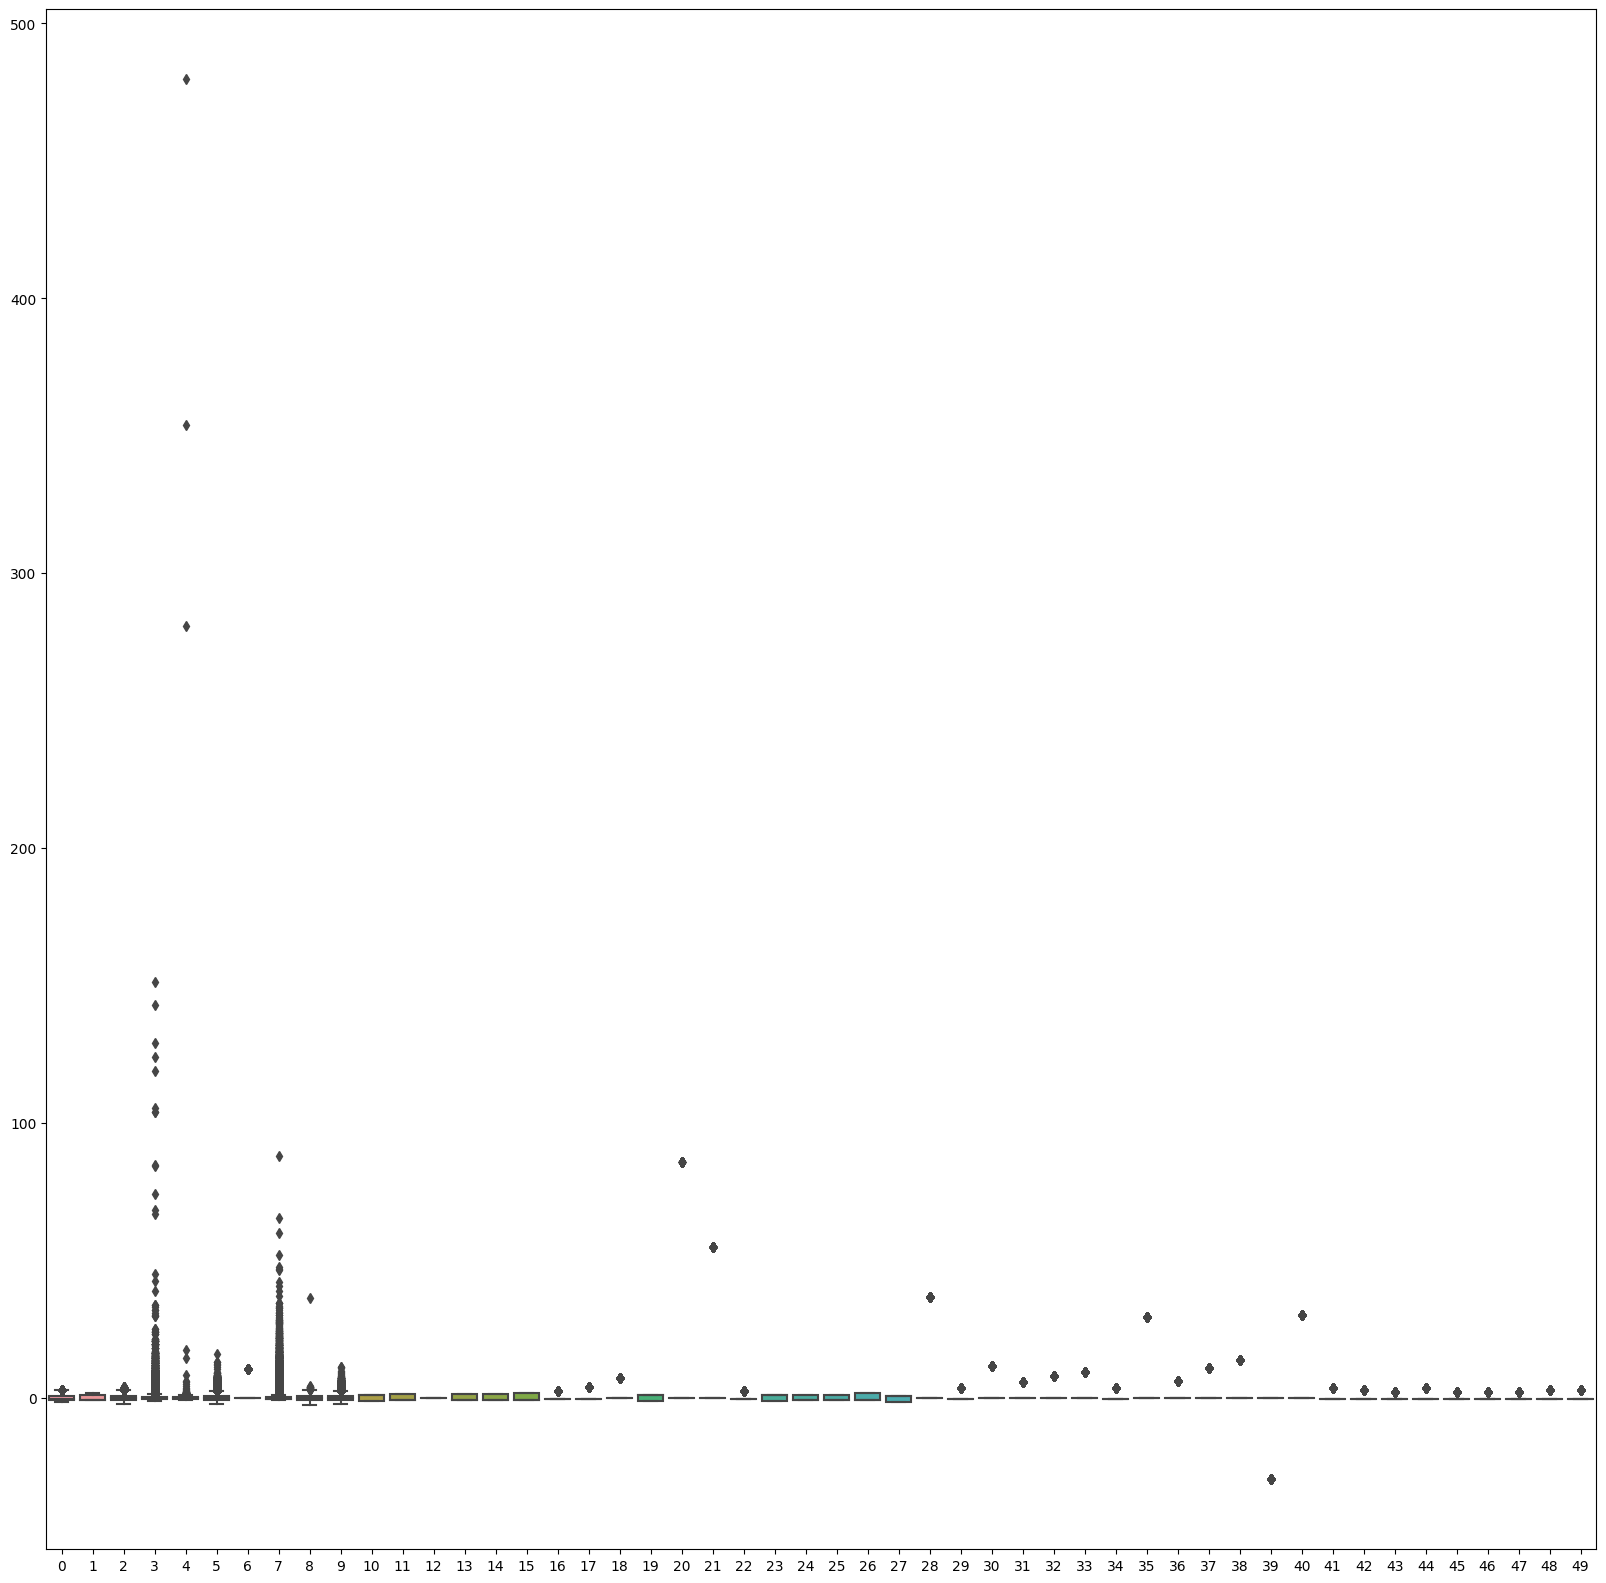

In [80]:
df_new_scale=pd.DataFrame(scaler.fit_transform(x_train))
fig, ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new_scale, ax=ax)

### Model Building

In [81]:
logR=LogisticRegression(verbose=1)

In [82]:
logR.fit(x_train,y_train)

LogisticRegression(verbose=1)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid_param={
           'C':list(np.arange(0.001,1,0.1))}

In [85]:
grid_log=GridSearchCV(estimator=logR,param_grid=grid_param,n_jobs=-1)

In [70]:
grid_log.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(verbose=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.101, 0.201, 0.30100000000000005, 0.401,
                               0.501, 0.6010000000000001, 0.7010000000000001,
                               0.801, 0.901]})

In [71]:
grid_log.best_params_

{'C': 0.6010000000000001}

In [55]:
model_new=LogisticRegression(C=0.6)
model_new.fit(x_train,y_train)

LogisticRegression(C=0.6)

In [56]:
model_new.score(x_train,y_train)

0.9293054410471048

In [57]:
model_new.score(x_test,y_test)

0.8872125068261769

In [58]:
print('Accuracy of Logistic Regression Classifier on train set: {:.3f}'.format(model_new.score(x_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model_new.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on train set: 0.929
Accuracy of Logistic Regression Classifier on test set: 0.887


In [59]:
model_new.coef_

array([[-5.54595046e-02, -1.60278117e-01,  3.75300084e-01,
         1.67464369e-01, -4.92285497e-01, -1.02967062e-01,
        -4.53825558e-03,  6.50588840e-02, -6.23706564e-02,
         9.99750090e-02,  2.75813538e-02,  4.95548326e-02,
         0.00000000e+00, -6.11900898e-01, -9.85487736e-01,
        -1.14993392e+00, -1.11168931e+00, -8.62514133e-01,
        -5.17920403e-01, -3.33708176e+00, -8.49483263e-02,
        -1.22851403e-01, -2.30542264e+00, -3.49100389e+00,
        -1.52831341e-01, -1.36965814e-01, -1.18686307e+00,
        -1.29706053e+00, -7.68763490e-02, -7.41055486e-01,
        -2.26638738e-01, -4.57688891e-01, -3.62402449e-01,
        -2.94333493e-01, -7.24823358e-01, -9.78462735e-02,
        -4.83910802e-01, -2.46296755e-01, -1.70559199e-01,
        -8.75677062e-03,  3.51500108e-02,  1.94805149e+00,
        -5.36025413e+00, -2.80404909e+00,  1.94834902e+00,
        -2.78819924e+00, -2.81769920e+00, -2.81024745e+00,
        -5.30683159e+00, -5.76324288e+00]])

In [60]:
model_new.intercept_

array([-4.47104749])

In [61]:
# coefficients = model_new.coef_
# avg_importance = np.mean(np.abs(coefficients), axis=0)
# feature_importance = pd.DataFrame({'Feature': X, 'Importance': avg_importance})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(30,50))

### Model Evaluation

In [97]:
y_pred = model_new.predict(x_test)

In [99]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### 1. classification report

In [100]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     15670
           1       0.88      0.99      0.93     63071

    accuracy                           0.89     78741
   macro avg       0.91      0.73      0.78     78741
weighted avg       0.89      0.89      0.87     78741



### Intepret the Results

The results from the classification report are promising, but there is definitely room for improvement.

- **Precision** measures the accuracy of positive predictions. The model has a high precision (0.93) for predicting charged off customers, meaning that when the model predicts that a customer will not pay loan amount, it is correct 93% of the time. The precision is also high for predicting fully paid customer (0.88), meaning that when the model predicts fully paid customers, it is correct 88% of the time.

- **Recall** (also known as sensitivity or true positive rate) measures the fraction of positives that were correctly identified. The model has a recall of 0.99 for fully paid customers and 0.47 for charged off customers. This means that the model correctly identifies 99% of the customers who will pay loan amount and 47% of the cusatomers will not be able to pay loan amount or will face difficulties to pay.

- The **F1 score** is a weighted average of precision and recall. The F1 scores for fully paid and charged off customers are 0.93 and 0.62, respectively. The low F1 score for charged off indicates that the model's performance is somewhat low when it comes to predicting charged off customers.

- The **accuracy** of the model is 0.89, which means that the model correctly predicts fully paid and charged off customers in 89% of the cases. 

<b>Recommendation: </b>
It's recommended to further fine-tune the model, possibly by exploring different algorithms, and/or engineering new features. The focus should be on improving the recall for the 'Charged off' class without significantly compromising the precision.

In [101]:
y_pred = model_new.predict_proba(x_test)
y_pred
probability=y_pred[:,1]

In [102]:
probability

array([0.99999989, 0.99999992, 0.99999981, ..., 0.8784676 , 0.99999993,
       0.49878094])

### 2. ROC AUC curve

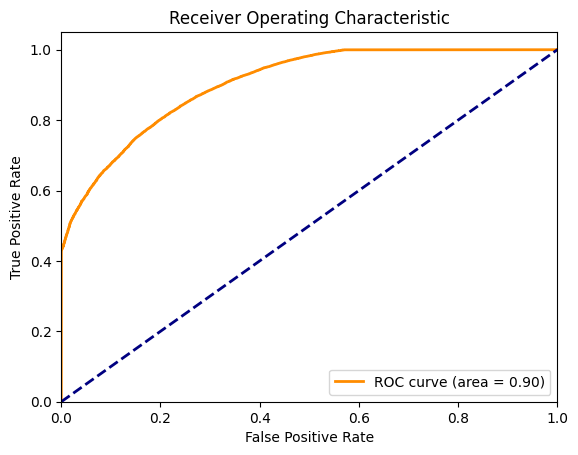

In [103]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, probability)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

* Make predictions on the train set

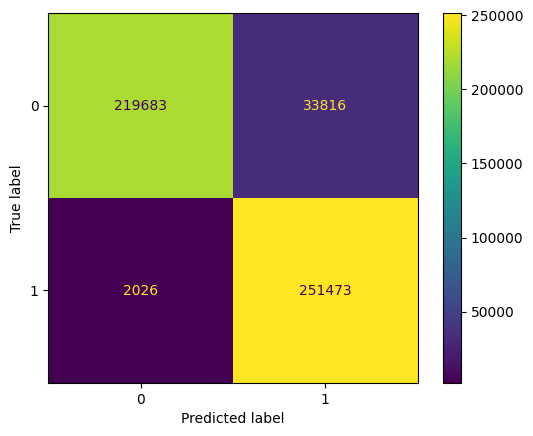

In [104]:

y_pred = model_new.predict(x_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train,y_pred, labels=model_new.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_new.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

* Make predictions on the test set

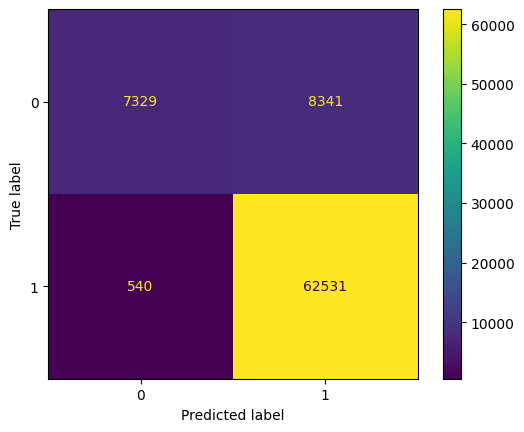

In [105]:

y_pred = model_new.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=model_new.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_new.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

In [106]:
import pickle
f=open("loan_repayment.pkl","wb")
pickle.dump(model_new,f)
f.close()